# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS
# VISITING MEXICO  (CDMX)

### Applied Data Science Capstone by Iván Alejandro
###Please accept thos as my report and presentation, my subscriptions ends today 15/04/21 and i can´t pay one more month thanks.

## Table of contents
* [Introduction](#introduction)
* [Business Problem](#business)
* [Data](#data)
* [Methodology](#methodology)
* [Explanatory Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

**Mexico City** (AKA CDMX) is the capital and largest  of Mexico and Latin America. It was fundated in 1325 under the name of Tenochtitlan, nowadays it has a surface area of 1495 km^2, it itself has a larger GDP than countries like Argentina or Colombia, according to the last census (2020) it has a population of 9 209 944 habitants, representing a 7.4 % of the total population.

CDMX has been one of the world's top tourism cities for many years, and a key gateway for domestic and international visitors. The total number of visitors in the , including domestic tourists, is estimated at 13 million per year. and 30 million at its highest (2017)  

The sector employs 795,000 people and contributes 600 usd per visitor, this is why it is such an important income to the .

## 2. Business Problem <a name="business"></a>

CDMX is a world tourist destination with many visitors each year. The information available concerning tourism in CDMX can be overwhelming and considering trips made to CDMX for holiday purposes lasted 4.8 nights on average in 2019, according to Statista, a good planning is necessary to make the most of the holidays, avoiding downtimes. CDMX has full potential to become the best  to visit in Europe but it still has challenges for visitors such as not using public transport wisely, waiting in long queues as a result of a poor planning and failing to research available attractions.

This project will analyse the venues available for people visiting CDMX in order to look for the best recreational activities and locations in the variety of Neighborhoods in CDMX . The venues will be analyzed first as a whole and structured afterwards by Neighborhood for a better comprehension as well.

This project will be interesting to visitors and expats who are considering visiting and relocating to CMDX as they will be able to identify the most attractive locations in CDMX and explore its Neighborhoods and common venues around each Neighborhood.

## 3. Data <a name="data"></a>

This section describes the data that will be used to solve the problem concerning the tourism and visits to CDMX .

### 3.1. Libraries

The libraries installed and imported to be used in this project are summarized below:

* Numpy: Library to handle data in a vectorized manner. It is used to create cluster labels during the clustering stage.

* Pandas: Library for data analysis. In this project is used to build DataFrames containing Postal Codes, Neighborhoods, venues, latitudes, longitudes.

* Requests: Library to handle requests. It is used to scrape the list of Postal Codes in CDMX  from Milesfaster website (please, refer to sources section below).

* BeautifulSoup: Library used for pulling data out of html and XML files. It is necessary to scrape information from web pages.

* Geopy: Library used to convert an address into latitude and latitude values. It is used to add the latitudes and longitudes to the Neighborhoods scraped.

* Json: Library to handle JSON files. In this project is used to make the GET request during the neighborhood exploration stage.

* folium: Library used to create maps. It is used to create maps in CDMX , containing all Neighborhoods previously scraped.

* matplotlib.pyplot: Library used to plot bar plots.

* Matplotlib.cm and Matplotlib.colors: Library used to plot a range of colors in CDMX  maps.

* WordCloud: Library used to plot a world cloud containing the most common venues in each Neighborhood.

* k-means: Library used to apply k-means clustering algorithm used to cluster Neighborhoods in CDMX .

### 3.2. Data Acquisition

The data acquired for this project contains the following columns:

* Postal Code 

* Neighborhood

* Borough

* Postal Code Latitude

* Postal Code Longitude

* Venue: Venue names within a Neighborhood in CDMX.

* Venue Latitude: Latitude of a given venue.

* Venue Longitude: Longitude of a given venue.

* Venue Category: Category of a given venue (such as bakery, coffee shop, movie theater, etc.)

* Most common venue: The most common venue within a Neighborhood ranging from 1st to 10th.

### 3.3. Data sources

For this project the following data and sources will be used:

* **Wikipedia** Scraping this site in order to obtain a dataframe of postal codes, boroughs and neighborhoods. https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_postales_mexicanos


* **ArcGIS** Geocoding is the computational process of transforming a physical address description to a location on the Earth's surface (spatial representation in numerical coordinates). ArcGIS will be used to turn addresses into coordinates, finding addresses interactively and geocoding a table of addresses.


* **Foursquare API** to get the most common venues of given Neighborhood in CDMX . Foursquare API has one of the largest database of 105+ million places and is used by over 1250,000 developers. It provides different data information of venues among Neighborhoods. Foursquare data contains venues, longitude, latitude and postal codes. The information obtained per venue as follows: Neighborhood, Borough latitude, Neighborhood longitude, venue name, venue latitude, venue longitude, venue category. This will be used in the methodology section.

#### Installing and importing libraries

Before exploring the data, the necessary libraries will be installed and imported.

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# install and import geocoder
!pip -q install geocoder
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # transform JSON file into a pandas DataFrame

!pip install beautifulsoup4
from bs4 import BeautifulSoup # import BeautifulSoup library

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# install wordcloud
!conda install -c conda-forge wordcloud==1.8.1 --yes

# import wordcloud and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

from PIL import Image # converting images into arrays

print('Libraries installed and imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries installed and imported.


### 3.4. Scraping the list of postal codes in CDMX  dataset from Milesfaster website

The raw data is extracted from Milesfaster website, then processed parsing the html document and finally converted into a DataFrame.

In [ ]:
response = requests.get(url="https://es.wikipedia.org/wiki/Anexo:C%C3%B3digos_postales_mexicanos",)
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
ul = soup.findAll("ul")
elements = ul[1].findAll("li")
for li in elements:
  print(li.text)

01020 Álvaro Obregón, Col. San José Insurgentes
01110 Álvaro Obregón, Col. Las Palmas
01210 Álvaro Obregón, Col. Centro de Ciudad Santa Fe
01790 Álvaro Obregón, Col. Lomas de San Ángel Inn
02300 Azcapotzalco, Fracc. Industrial de Vallejo
02460 Azcapotzalco, Col. La Preciosa
02630 Azcapotzalco, Col. Coltongo
02770 Azcapotzalco, Col. Santa Cruz Acayucan
02800 Azcapotzalco, Col. Nueva Santa María
02870 Azcapotzalco, Col. San Salvador Xochimanca
03020 Benito Juárez, Col. Narvarte
03400 Benito Juárez, Col. Álamos
03100 Benito Juárez, Col. Del Valle
03810 Benito Juárez, Col. Nápoles
03700 Benito Juárez, Col. Nonoalco
03510 Benito Juárez, Col. Moderna
03900 Benito Juárez, Col. San José Insurgentes
03940 Benito Juárez, Col. Crédito Constructor
04100 Coyoacán, Col. del Carmen
04620 Coyoacán, Col. San Pablo Tepetlapa
04650 Coyoacán,  Col. Pueblo de Santa Úrsula Coapa
04910 Coyoacán,  Col. Santa Úrsula Coapa
05100 Cuajimalpa, Col. Lomas de Vista Hermosa
05120 Cuajimalpa, Col. Bosques de las Lomas

In [ ]:
type(elements)

bs4.element.ResultSet

In [ ]:
df_list= []
for element in elements:
  cell = {}
  li = element.text
  split_element = li.split(",")
  double_split = split_element[0].split(" ",1)
  cell['PostalCode'] = double_split[0]
  cell['Borough'] =  double_split[1]
  cell['Neighborhood'] = split_element[1]
  df_list.append(cell)

for element in df_list:
  print(element)

{'PostalCode': '01020', 'Borough': 'Álvaro Obregón', 'Neighborhood': ' Col. San José Insurgentes'}
{'PostalCode': '01110', 'Borough': 'Álvaro Obregón', 'Neighborhood': ' Col. Las Palmas'}
{'PostalCode': '01210', 'Borough': 'Álvaro Obregón', 'Neighborhood': ' Col. Centro de Ciudad Santa Fe'}
{'PostalCode': '01790', 'Borough': 'Álvaro Obregón', 'Neighborhood': ' Col. Lomas de San Ángel Inn'}
{'PostalCode': '02300', 'Borough': 'Azcapotzalco', 'Neighborhood': ' Fracc. Industrial de Vallejo'}
{'PostalCode': '02460', 'Borough': 'Azcapotzalco', 'Neighborhood': ' Col. La Preciosa'}
{'PostalCode': '02630', 'Borough': 'Azcapotzalco', 'Neighborhood': ' Col. Coltongo'}
{'PostalCode': '02770', 'Borough': 'Azcapotzalco', 'Neighborhood': ' Col. Santa Cruz Acayucan'}
{'PostalCode': '02800', 'Borough': 'Azcapotzalco', 'Neighborhood': ' Col. Nueva Santa María'}
{'PostalCode': '02870', 'Borough': 'Azcapotzalco', 'Neighborhood': ' Col. San Salvador Xochimanca'}
{'PostalCode': '03020', 'Borough': 'Benito J

In [ ]:
# displaying the first 10 results in the DataFrame
df = pd.DataFrame(df_list)
df.head(10)

PostalCode         Borough                     Neighborhood
0      01020  Álvaro Obregón        Col. San José Insurgentes
1      01110  Álvaro Obregón                  Col. Las Palmas
2      01210  Álvaro Obregón   Col. Centro de Ciudad Santa Fe
3      01790  Álvaro Obregón      Col. Lomas de San Ángel Inn
4      02300    Azcapotzalco     Fracc. Industrial de Vallejo
5      02460    Azcapotzalco                 Col. La Preciosa
6      02630    Azcapotzalco                    Col. Coltongo
7      02770    Azcapotzalco         Col. Santa Cruz Acayucan
8      02800    Azcapotzalco           Col. Nueva Santa María
9      02870    Azcapotzalco     Col. San Salvador Xochimanca

In [ ]:
print(df)

   PostalCode                Borough                         Neighborhood
0       01020         Álvaro Obregón            Col. San José Insurgentes
1       01110         Álvaro Obregón                      Col. Las Palmas
2       01210         Álvaro Obregón       Col. Centro de Ciudad Santa Fe
3       01790         Álvaro Obregón          Col. Lomas de San Ángel Inn
4       02300           Azcapotzalco         Fracc. Industrial de Vallejo
5       02460           Azcapotzalco                     Col. La Preciosa
6       02630           Azcapotzalco                        Col. Coltongo
7       02770           Azcapotzalco             Col. Santa Cruz Acayucan
8       02800           Azcapotzalco               Col. Nueva Santa María
9       02870           Azcapotzalco         Col. San Salvador Xochimanca
10      03020          Benito Juárez                        Col. Narvarte
11      03400          Benito Juárez                          Col. Álamos
12      03100          Benito Juárez  

### 3.5. Data Cleaning

Let's get the size of the df_CDMX DataFrame.

In [ ]:
# printing the size of the DataFrame
print('The shape for the DataFrame is:', df.shape)

The shape for the DataFrame is: (74, 3)


In [ ]:
df.describe()

PostalCode         Borough      Neighborhood
count          74              74                74
unique         74              15                71
top         10300  Miguel Hidalgo   Col. Las Palmas
freq            1              14                 2

The DataFrame contains 74 Postal Codes (rows) and 3 columns: Postal Code, Boroguh and Neighboorhood.

### 3.6. Adding the latitude and longitude coordinates to the DataFrame

A new function will be created to get the coordinates for all Neighborhoods using ArcGIS, a powerful library useful for spatial analysis and mapping.

In [ ]:
# creating a function to get the coordinates (latitude, longitude) for all Boroughs
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Mexico City, Mexico'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords

Let's test the function get_geocode created previously with two random Postal Codes to get their latitude and longitude coordinates.

In [ ]:
# sampling two random chosen Postal codes to get their latitude and longitude coordinates using the function get_geocode
sample1 = get_latilong('06700')
print(sample1)

sample2 = get_latilong('16050')
print(sample2)

[19.418210010000053, -99.16470466199996]
[19.260935010000026, -99.11342883999998]


As illustrated the function get_geocode is working well. The function will be applied to df_CDMX DataFrame.

In [ ]:
# storing the location data (latitude and longitude) in the DataFrame df_CDMX
postal_codes = df['PostalCode']
coordinates = [get_latilong(postal_codes) for postal_codes in postal_codes.tolist()]

# The coordinates are joined to df_CDMX DataFrame to create a new DataFrame with the latitude and longitude
df_Coords = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df['Latitude'] = df_Coords['Latitude']
df['Longitude'] = df_Coords['Longitude']
df_CDMX =df
# displaying the first 10 results in the new merged DataFrame df_CDMX
df_CDMX.head(10)

PostalCode         Borough                     Neighborhood   Latitude  \
0      01020  Álvaro Obregón        Col. San José Insurgentes  19.356728   
1      01110  Álvaro Obregón                  Col. Las Palmas  19.395930   
2      01210  Álvaro Obregón   Col. Centro de Ciudad Santa Fe  19.382865   
3      01790  Álvaro Obregón      Col. Lomas de San Ángel Inn  19.344865   
4      02300    Azcapotzalco     Fracc. Industrial de Vallejo  19.498170   
5      02460    Azcapotzalco                 Col. La Preciosa  19.486968   
6      02630    Azcapotzalco                    Col. Coltongo  19.482755   
7      02770    Azcapotzalco         Col. Santa Cruz Acayucan  19.476070   
8      02800    Azcapotzalco           Col. Nueva Santa María  19.462848   
9      02870    Azcapotzalco     Col. San Salvador Xochimanca  19.459610   

   Longitude  
0 -99.186595  
1 -99.214457  
2 -99.240197  
3 -99.206342  
4 -99.163374  
5 -99.194195  
6 -99.153122  
7 -99.194448  
8 -99.168650  
9 -99.174233

The new DataFrame will be used to generate the venues for each Neighborhood using Foursquare API.

In [ ]:
df_CDMX.shape

(74, 5)

### 3.7. Using Foursquare API to explore the Neighborhoods and segment them

The geographical coordinates of CDMX, U.K. will be obtained using Nominatim.

In [ ]:
# getting the geographical coordinates of CDMX 
address = 'CDMX, Mexico'

geolocator = Nominatim(user_agent = "ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of CDMX are: {}, {}'.format(latitude, longitude))

The geographical coordinates of CDMX are: 19.4326296, -99.1331785


The Neighborhoods of CDMX  will be visualized using Folium library.

In [ ]:
# creating a map of CDMX  using latitude and longitude values
map_CDMX = folium.Map(location=[latitude, longitude], zoom_start = 11)

# adding markers to CDMX  map
for lat, lng, postal_code, Borough, nei in zip(df_CDMX['Latitude'], df_CDMX['Longitude'], df_CDMX['PostalCode'], df_CDMX['Borough'],df_CDMX['Neighborhood']):
    label = '{}, {}, {}'.format(postal_code, Borough, nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    ).add_to(map_CDMX)
    
map_CDMX

In [ ]:
# defining Foursquare credentials and version
CLIENT_ID = 'R42KIBFKKMBTW2YMIUHG3LHZWTT0M1CQL3I1OHQG1USJFNMA' # Foursquare ID
CLIENT_SECRET = 'FSGIITZHOOILT0CYB5LONVBZZENQPS5HHY4Y0OX1CGO5FZ4S' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: R42KIBFKKMBTW2YMIUHG3LHZWTT0M1CQL3I1OHQG1USJFNMA
CLIENT_SECRETFSGIITZHOOILT0CYB5LONVBZZENQPS5HHY4Y0OX1CGO5FZ4S


Let's create a function to repeat the same process to all Neighborhoods in CDMX .

In [ ]:
# exploring the Neighborhoods in CDMX 
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                            'Neighborhood Latitude',
                            'Neighborhood Longitude',
                            'Venue',
                            'Venue Latitude',
                            'Venue Longitude',
                            'Venue Category']
    
    return(nearby_venues)

In [ ]:
# returning a list of venues near the current location
CDMX_venues = getNearbyVenues(names=df_CDMX['Neighborhood'],
                                latitudes=df_CDMX['Latitude'],
                                longitudes=df_CDMX['Longitude'])

 Col. San José Insurgentes
 Col. Las Palmas
 Col. Centro de Ciudad Santa Fe
 Col. Lomas de San Ángel Inn
 Fracc. Industrial de Vallejo
 Col. La Preciosa
 Col. Coltongo
 Col. Santa Cruz Acayucan
 Col. Nueva Santa María
 Col. San Salvador Xochimanca
 Col. Narvarte
 Col. Álamos
 Col. Del Valle
 Col. Nápoles
 Col. Nonoalco
 Col. Moderna
 Col. San José Insurgentes
 Col. Crédito Constructor
 Col. del Carmen
 Col. San Pablo Tepetlapa
  Col. Pueblo de Santa Úrsula Coapa
  Col. Santa Úrsula Coapa
 Col. Lomas de Vista Hermosa
 Col. Bosques de las Lomas
 Col. Centro
  Col. Juárez
 Col. Roma
  Col. Doctores
  Col. Obrera
  Col. Nonoalco Tlatelolco
 Col. Maximimo Àvila Camacho
  Col. Héroe de Nacozari
  Col. Industrial
  Col. Tres Estrellas
  Col. San Juan de Aragón
 Col. Pantitlán
 Col. Viaducto Piedad
 Col. Santa Anita
 Col. Granjas México
 Col. Agrícola Oriental
 Col. Central de Abastos
 Col. Sector Popular
 Col. Granjas San Antonio
 Col. Ejército de Oriente
 Col. Santa Martha Acatitla
 Col. Lom

Let's check the size of the resulting DataFrame.

In [ ]:
# printing the first 10 nearby venues in CDMX  Neighborhoods
CDMX_venues.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Col. San José Insurgentes              19.356728              -99.186595   
1   Col. San José Insurgentes              19.356728              -99.186595   
2   Col. San José Insurgentes              19.356728              -99.186595   
3   Col. San José Insurgentes              19.356728              -99.186595   
4   Col. San José Insurgentes              19.356728              -99.186595   
5   Col. San José Insurgentes              19.356728              -99.186595   
6   Col. San José Insurgentes              19.356728              -99.186595   
7   Col. San José Insurgentes              19.356728              -99.186595   
8   Col. San José Insurgentes              19.356728              -99.186595   
9   Col. San José Insurgentes              19.356728              -99.186595   

                      Venue  Venue Latitude  Venue Longitude  \
0                     Garko       19.357522       -99.184680   
1          Tacos y Etiqueta       19.354986       -99.186675   
2                 Amana Spa       19.358676       -99.182864   
3                      Nacu       19.355677       -99.185560   
4      Loretta Chic Bistrot       19.355622       -99.189881   
5         Autocinema Coyote       19.359956       -99.183734   
6  Centro Cultural Helénico       19.353093       -99.190111   
7                 Don Asado       19.356047       -99.184560   
8          Casa De Castilla       19.353588       -99.190129   
9      El Péndulo San Ángel       19.352887       -99.190093   

              Venue Category  
0                Coffee Shop  
1                 Taco Place  
2                        Spa  
3         Seafood Restaurant  
4                     Bistro  
5        Indie Movie Theater  
6                    Theater  
7  South American Restaurant  
8         Spanish Restaurant  
9                  Bookstore

In [ ]:
# size of the CDMX_venues DataFrame
print('The shape of CDMX_venues DataFrame is:', CDMX_venues.shape)

The shape of CDMX_venues DataFrame is: (7176, 7)


In [ ]:
# checking the number of venues in each Neighborhood
CDMX_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                 
  Col. Doctores                                        100   
  Col. Héroe de Nacozari                               100   
  Col. Industrial                                      100   
  Col. Juárez                                          100   
  Col. Nonoalco Tlatelolco                             100   
  Col. Obrera                                          100   
  Col. Pueblo de Santa Úrsula Coapa                    100   
  Col. San Juan de Aragón                              100   
  Col. Santa Úrsula Coapa                              100   
  Col. Tres Estrellas                                  100   
 Col. Agrícola Oriental                                100   
 Col. Amóérica                                         100   
 Col. Anzures                                          100   
 Col. Argentina Poniente                               100   
 Col. Bosques de las Lomas                             200   
 Col. Central de Abastos                               100   
 Col. Centro                                           100   
 Col. Centro de Ciudad Santa Fe                        100   
 Col. Coltongo                                         100   
 Col. Crédito Constructor                              100   
 Col. Del Valle                                        100   
 Col. Ejército de Oriente                               74   
 Col. Escandón                                         100   
 Col. Granada                                          100   
 Col. Granjas Esmeralda                                100   
 Col. Granjas México                                   100   
 Col. Granjas San Antonio                              100   
 Col. Irrigación                                       100   
 Col. Jardín Balbuena                                  100   
 Col. La Joya                                          100   
 Col. La Preciosa                                      100   
 Col. Las Palmas                                       165   
 Col. Lomas de Chapultepec                             100   
 Col. Lomas de San Ángel Inn                           100   
 Col. Lomas de Vista Hermosa                           100   
 Col. Lomas de Zaragoza                                 66   
 Col. Lorenzo Boturini                                 100   
 Col. Los Morales Polanco                              100   
 Col. Magdalena Mixhuca                                100   
 Col. Maximimo Àvila Camacho                           100   
 Col. Merced Centro                                    100   
 Col. Moderna                                          100   
 Col. Narvarte                                         100   
 Col. Nonoalco                                         100   
 Col. Nueva Santa María                                100   
 Col. Nápoles                                          100   
 Col. Palmitas Polanco                                 100   
 Col. Pantitlán                                        100   
 Col. Pensil                                           100   
 Col. Polanco                                          100   
 Col. Reforma Social                                   100   
 Col. Roma                                             100   
 Col. Romero Rubio                                     100   
 Col. San Bernabé Ocotepec                              70   
 Col. San Bernardino                                   100   
 Col. San José Insurgentes                             200   
 Col. San Juan Xalpa                                   100   
 Col. San Pablo Tepetlapa                              100   
 Col. San Salvador Xochimanca                          100   
 Col. Santa Anita                                      100   
 Col. Santa Cruz Acayucan                              100   
 Col. Santa Martha Acatitla                             78   
 Col. Sector Popular                                   100   
 Col. T

In [ ]:
print('There are {} uniques categories.'.format(len(CDMX_venues['Venue Category'].unique())))

There are 314 uniques categories.


## 4. Methodology <a name="methodology"></a>

The methodology applied in this project is as follows:

1. Foursquare API will be used to explore all venues of all Neighborhoods and analyze each Neighborhood in CDMX .


2. The most relevant venues to visit will be retrieved from the entire DataFrame and visualized in bar plots.


3. The most common venues will be analyzed using word cloud to look for the most common words and translate them into venues.


5. Each Neighborhood will be grouped with the 10 most common venues.


6. All Neighborhoods in CDMX  will be clustered, visualized and examined using k-means algorithm.


7. The resulting clusters will be analyzed using word cloud to validate the analyses performed in previous sections.

## 5. Explanatory Analysis <a name="analysis"></a>

This section consists in performing an explanatory data analysis and deriving some additional information from the raw data. The first step is analyzing each distric looking for venues.

### 5.1. Analyzing Neighborhoods

In [ ]:
# one hot encoding
CDMX_onehot = pd.get_dummies(CDMX_venues[['Venue Category']], prefix="", prefix_sep="")

# adding Neighborhood column back to DataFrame
CDMX_onehot['Neighborhood'] = CDMX_venues['Neighborhood']

# moving Neighborhood column to the first column
fixed_columns = [CDMX_onehot.columns[-1]] + list(CDMX_onehot.columns[:-1])
CDMX_onehot = CDMX_onehot[fixed_columns]

CDMX_onehot.head()

Zoo Exhibit  Accessories Store  Advertising Agency  Airport Lounge  \
0            0                  0                   0               0   
1            0                  0                   0               0   
2            0                  0                   0               0   
3            0                  0                   0               0   
4            0                  0                   0               0   

   Airport Service  American Restaurant  Arcade  Arepa Restaurant  \
0                0                    0       0                 0   
1                0                    0       0                 0   
2                0                    0       0                 0   
3                0                    0       0                 0   
4                0                    0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                     0                 0                   0            0   
1                     0                 0                   0            0   
2                     0                 0                   0            0   
3                     0                 0                   0            0   
4                     0                 0                   0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0              0                0          0           0           0       0   
1              0                0          0           0           0       0   
2              0                0          0           0           0       0   
3              0                0          0           0           0       0   
4              0                0          0           0           0       0   

   Bar  Baseball Field  Baseball Stadium  Bed & Breakfast  Beer Bar  \
0    0               0                 0                0         0   
1    0               0                 0                0         0   
2    0               0                 0                0         0   
3    0               0                 0                0         0   
4    0               0                 0                0         0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0            0           0              0                         0   
1            0           0              0                         0   
2            0           0              0                         0   
3            0           0              0                         0   
4            0           0              0                         0   

   Bike Trail  Bistro  Boarding House  Bookstore  Botanical Garden  Boutique  \
0           0       0               0          0                 0         0   
1           0       0               0          0                 0         0   
2           0       0               0          0                 0         0   
3           0       0               0          0                 0         0   
4           0       1               0          0                 0         0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0           0                     0               0        0   
1              0           0                     0               0        0   
2              0           0                     0               0        0   
3              0           0                     0               0        0   
4              0  

Let's examine the new DataFrame size.

In [ ]:
# getting the size of the CDMX_onehot DataFrame
CDMX_onehot.shape

(7176, 314)

The most relevant venue categories will be counted with the purpose of evaluating whether or not CDMX is a good place to travel.

In [ ]:
# getting the number of Restaurants in CDMX 
print('The number of Restaurants in CDMX  is:', (CDMX_onehot[['German Restaurant','Mexican Restaurant','French Restaurant','Indian Restaurant','Latin American Restaurant','Fast Food Restaurant','Chinese Restaurant','Cuban Restaurant','Restaurant','American Restaurant','Sushi Restaurant','Seafood Restaurant','Arepa Restaurant','Argentinian Restaurant','Asian Restaurant','Brazilian Restaurant']].values==1).sum())

# getting the number of Train Stations in CDMX 
print('The number of Coffe Shops in CDMX  is:', (CDMX_onehot[['Cafeteria','Coffee Shop','Café']].values==1).sum())

# getting the number of Restaurants in CDMX 
print('The number of Mexican Restaurants in CDMX  is:', (CDMX_onehot['Mexican Restaurant'].values==1).sum())

# getting the number of Museums in CDMX 
print('The number of Museums in CDMX  is:', (CDMX_onehot[['History Museum','Science Museum','Art Museum']].values==1).sum())

# getting the number of Bookstores in CDMX 
print('The number of Bookstores in CDMX  is:', (CDMX_onehot['Bookstore'].values==1).sum())

# getting the number of Gyms in CDMX 
print('The number of Gyms in CDMX  is:', (CDMX_onehot['Gym'].values==1).sum())

# getting the number of Hotels in CDMX 
print('The number of Hotels in CDMX  is:', (CDMX_onehot['Hotel'].values==1).sum())

# getting the number of Bars in CDMX 
print('The number of Nigth Clubs in CDMX  is:', (CDMX_onehot[['Bar','Nightclub','Dance Studio','Gay Bar']].values==1).sum())

# getting the number of Shopping Malls in CDMX 
print('The number of Shopping Malls in CDMX  is:', (CDMX_onehot['Shopping Mall'].values==1).sum())

# getting the number of Gift Shops in CDMX 
print('The number of Pizza Shops in CDMX  is:', (CDMX_onehot['Pizza Place'].values==1).sum())

# getting the number of Theaters in CDMX 
print('The number of Theaters in CDMX  is:', (CDMX_onehot['Theater'].values==1).sum())

print('The number of Movie Theaters in CDMX  is:', (CDMX_onehot['Movie Theater'].values==1).sum())

# getting the number of Theaters in CDMX 
print('The number of Parks in CDMX  is:', (CDMX_onehot['Park'].values==1).sum())

# getting the number of Restaurants in CDMX 
print('The number of Ice Cream Shops in CDMX  is:', (CDMX_onehot['Ice Cream Shop'].values==1).sum())

# getting the number of Taco Shops in CDMX 
print('The number of Taco Shops in CDMX  is:', (CDMX_onehot['Taco Place'].values==1).sum())

The number of Restaurants in CDMX  is: 1445
The number of Coffe Shops in CDMX  is: 457
The number of Mexican Restaurants in CDMX  is: 812
The number of Museums in CDMX  is: 53
The number of Bookstores in CDMX  is: 37
The number of Gyms in CDMX  is: 82
The number of Hotels in CDMX  is: 53
The number of Nigth Clubs in CDMX  is: 102
The number of Shopping Malls in CDMX  is: 46
The number of Pizza Shops in CDMX  is: 133
The number of Theaters in CDMX  is: 27
The number of Movie Theaters in CDMX  is: 53
The number of Parks in CDMX  is: 133
The number of Ice Cream Shops in CDMX  is: 299
The number of Taco Shops in CDMX  is: 701


Based on this information retrieved from CDMX_onehot DataFrame containing the number of restaurants, train stations, aquariums, art museums, bookstores, gyms, hotels, bars, shopping malls, gift shops, theatres and zoos in CDMX , a new DataFrame will be created to visualize these venues in a bar plot.

In [ ]:
# building a new DataFrame containing the venues previously explored
data1 ={'Venue Type': ['Restaurants', 'Coffee Shops', 'Mexican Restaurants', 'Museums', 'Bookstores', 
                 'Gyms', 'Hotels', 'Nightclubs', 'Shopping Malls','Pizza Shops', 'Theaters', 'Movie Theaters', 'Parks','Ice Cream Shops','Taco Shops'],
      'Total Venues': [1445, 457, 812, 53, 37, 82, 53, 102, 46, 133, 27, 53, 133, 299, 701]}

df_CDMX_num_venues = pd.DataFrame(data1, columns = ['Venue Type', 'Total Venues'])

print(df_CDMX_num_venues)

             Venue Type  Total Venues
0           Restaurants          1445
1          Coffee Shops           457
2   Mexican Restaurants           812
3               Museums            53
4            Bookstores            37
5                  Gyms            82
6                Hotels            53
7            Nightclubs           102
8        Shopping Malls            46
9           Pizza Shops           133
10             Theaters            27
11       Movie Theaters            53
12                Parks           133
13      Ice Cream Shops           299
14           Taco Shops           701


Let's build the bar plot with the most relevant venues in CDMX .

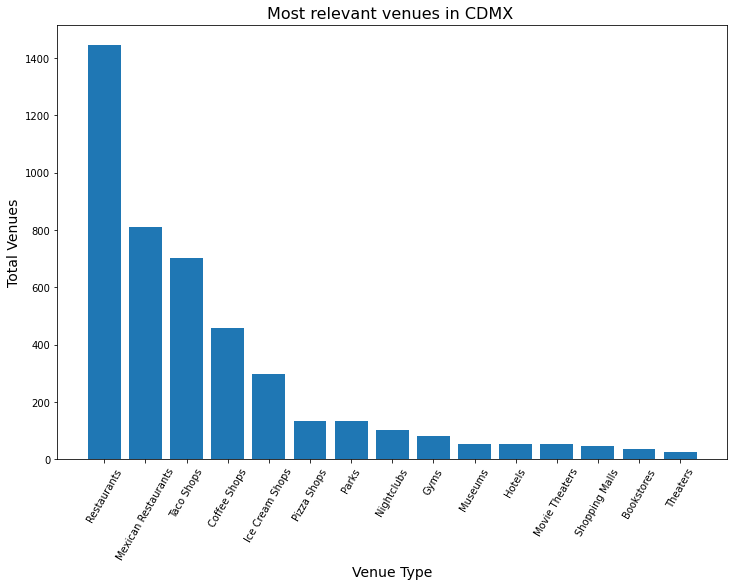

In [ ]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_CDMX_num_venues' DataFrame
plt.figure(figsize=(12, 8))

df3 = df_CDMX_num_venues.sort_values('Total Venues', ascending=False)
plt.bar(df3['Venue Type'], df3['Total Venues'])

# title
plt.title('Most relevant venues in CDMX ', fontsize=16)

# labels
plt.xlabel('Venue Type', fontsize=14)
plt.ylabel('Total Venues', fontsize=14)

# rotating x label
plt.xticks(rotation=60)

# increasing the default intervals for y-axis
#plt.yticks(np.arange(0, 270, 20))

# displaying the bar plot
plt.show()

As can be noted from the bar plot above, from the venues selected, hotels are the most common venue in CDMX , followed by restaurants. Now hotels will be grouped by Neighborhood to find which Neighborhoods have most hotels in CDMX .

Let's build the bar plot containing the 10 Neighborhoods with the largest number of hotels.

As previously mentioned, restaurants is the next category from the venues selected. The next analysis consists in grouping restaurants by Neighborhood to find which Neighborhoods have most restaurants in CDMX . National and international restaurants will be counted to get an idea about the variety of cuisines available in CDMX  restaurants.

In [ ]:
# getting the number of American Restaurants in CDMX 
print('The number of American Restaurants in CDMX  is:', (CDMX_onehot['American Restaurant'].values==1).sum())

# getting the number of Asian Restaurants in CDMX 
print('The number of Asian Restaurants in CDMX  is:', (CDMX_onehot['Asian Restaurant'].values==1).sum())

# getting the number of Chinese Restaurants in CDMX 
print('The number of Chinese Restaurants in CDMX  is:', (CDMX_onehot['Chinese Restaurant'].values==1).sum())


# getting the number of Italianh Restaurants in CDMX 
print('The number of Italian Restaurants in CDMX  is:', (CDMX_onehot['Italian Restaurant'].values==1).sum())

# getting the number of Japanese Restaurants in CDMX 
print('The number of Japanese Restaurants in CDMX  is:', (CDMX_onehot['Japanese Restaurant'].values==1).sum())

# getting the number of Spanish Restaurants in CDMX 
print('The number of Spanish Restaurants in CDMX  is:', (CDMX_onehot['Spanish Restaurant'].values==1).sum())

# getting the number of Mexican Restaurants in CDMX 
print('The number of Mexican Restaurants in CDMX  is:', (CDMX_onehot['Mexican Restaurant'].values==1).sum())

# getting the number of Latin American Restaurants in CDMX 
print('The number of Latin American Restaurants in CDMX  is:', (CDMX_onehot['Latin American Restaurant'].values==1).sum())

# getting the number of Tacos Restaurants in CDMX 
print('The number of Tacos Restaurants in CDMX  is:', (CDMX_onehot['Taco Place'].values==1).sum())

The number of American Restaurants in CDMX  is: 14
The number of Asian Restaurants in CDMX  is: 16
The number of Chinese Restaurants in CDMX  is: 25
The number of Italian Restaurants in CDMX  is: 62
The number of Japanese Restaurants in CDMX  is: 56
The number of Spanish Restaurants in CDMX  is: 22
The number of Mexican Restaurants in CDMX  is: 812
The number of Latin American Restaurants in CDMX  is: 12
The number of Tacos Restaurants in CDMX  is: 701


A new DataFrame based on this information retrieved from CDMX_onehot DataFrame will be created containing the number of restaurants by origin or cuisine type in CDMX  with the purpose of visualizing these restaurants in a bar plot.

In [ ]:
# creating a new DataFrame containing the different restaurants by cuisine type in CDMX 
data2 ={'Restaurant Type': ['American', 'Asian', 'Chinese', 'Italian', 'Japanese',
                          'Spanish', 'Mexican', 'Latin American','Tacos'],
      'Total of Restaurants': [14, 16, 25,62,56,22,812,12,701]}

df_CDMX_restaurant_types = pd.DataFrame(data2, columns = ['Restaurant Type', 'Total of Restaurants'])

print(df_CDMX_restaurant_types)

  Restaurant Type  Total of Restaurants
0        American                    14
1           Asian                    16
2         Chinese                    25
3         Italian                    62
4        Japanese                    56
5         Spanish                    22
6         Mexican                   812
7  Latin American                    12
8           Tacos                   701


Let's build the bar plot with the total of different types of restaurants in CDMX .

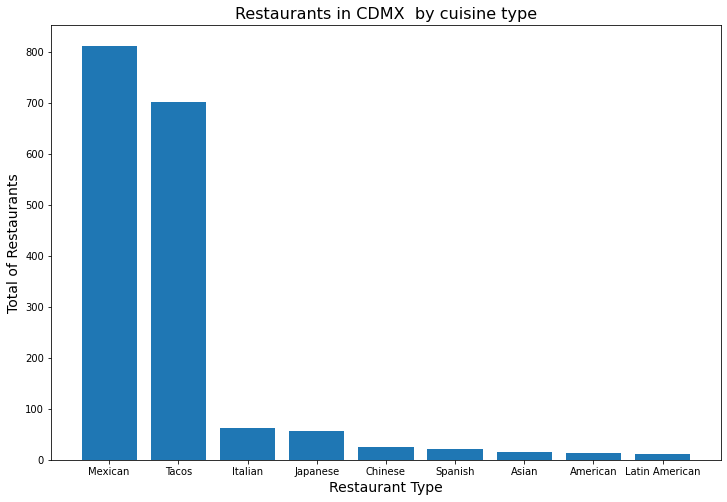

In [ ]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_CDMX_restaurant_types' DataFrame
plt.figure(figsize=(12, 8))

df6 = df_CDMX_restaurant_types.sort_values('Total of Restaurants', ascending=False)
plt.bar(df6['Restaurant Type'], df6['Total of Restaurants'])

# title
plt.title('Restaurants in CDMX  by cuisine type', fontsize=16)

# labels
plt.xlabel('Restaurant Type', fontsize=14)
plt.ylabel('Total of Restaurants', fontsize=14)


# displaying the bar plot
plt.show()

As observed above, Italian and Indian restaurants lead the cuisines in CDMX . A more detailed analysis will reveal the spatial distribution of such restaurants by Neighborhood.

In [ ]:
# grouping CDMX_onehot DataFrame by Neighborhood and getting the Italian Restaurants column with the number of these restaurants by Neighborhood
df_CDMX_mex_restaurants = CDMX_onehot.groupby('Neighborhood', axis=0)['Mexican Restaurant'].sum().reset_index()

# printing the first 10 results
print(df_CDMX_mex_restaurants.head(10))

                          Neighborhood  Mexican Restaurant
0                        Col. Doctores                   8
1               Col. Héroe de Nacozari                  13
2                      Col. Industrial                  10
3                          Col. Juárez                   5
4             Col. Nonoalco Tlatelolco                  17
5                          Col. Obrera                  22
6    Col. Pueblo de Santa Úrsula Coapa                  14
7              Col. San Juan de Aragón                  16
8              Col. Santa Úrsula Coapa                  10
9                  Col. Tres Estrellas                  16


Let's build the bar plot containing the 10 Neighborhoods with the largest number of italian restaurants.

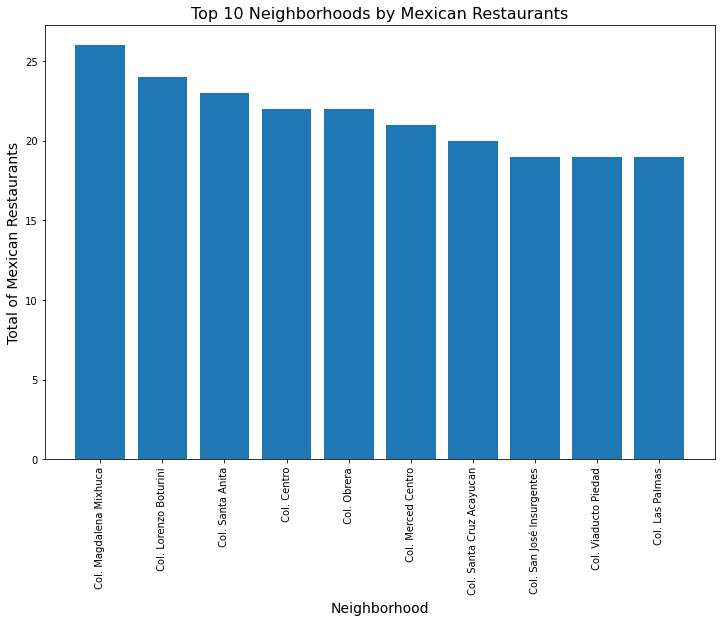

In [ ]:
# magic function that renders the figure in a notebook
%matplotlib inline 

# bar plot of the 'df_CDMX_mex_restaurants' DataFrame
plt.figure(figsize=(12, 8))

df7 = df_CDMX_mex_restaurants.sort_values('Mexican Restaurant', ascending=False).head(10)
plt.bar(df7['Neighborhood'], df7['Mexican Restaurant'])

# title
plt.title('Top 10 Neighborhoods by Mexican Restaurants', fontsize=16)

# labels
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Total of Mexican Restaurants', fontsize=14)

# rotating x label
plt.xticks(rotation=90)


# displaying the bar plot
plt.show()

Let's build the bar plot containing the 10 Neighborhoods with the largest number of indian restaurants.

The next step consists in grouping rows by Neighborhood and taking the mean of the frequency of occurrence of each category.

In [ ]:
# grouping rows by Neighborhood
CDMX_grouped = CDMX_onehot.groupby('Neighborhood').mean().reset_index()
CDMX_grouped.head()

Neighborhood  Zoo Exhibit  Accessories Store  \
0               Col. Doctores          0.0                0.0   
1      Col. Héroe de Nacozari          0.0                0.0   
2             Col. Industrial          0.0                0.0   
3                 Col. Juárez          0.0                0.0   
4    Col. Nonoalco Tlatelolco          0.0                0.0   

   Advertising Agency  Airport Lounge  Airport Service  American Restaurant  \
0                 0.0             0.0              0.0                 0.00   
1                 0.0             0.0              0.0                 0.00   
2                 0.0             0.0              0.0                 0.00   
3                 0.0             0.0              0.0                 0.01   
4                 0.0             0.0              0.0                 0.00   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0     0.0               0.0                    0.00         0.01        0.00   
1     0.0               0.0                    0.00         0.00        0.00   
2     0.0               0.0                    0.01         0.00        0.00   
3     0.0               0.0                    0.00         0.01        0.00   
4     0.0               0.0                    0.00         0.01        0.02   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                 0.00                   0.0              0.03   
1                 0.01                   0.0              0.00   
2                 0.00                   0.0              0.00   
3                 0.00                   0.0              0.02   
4                 0.01                   0.0              0.00   

   Athletics & Sports  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0                 0.0          0.0            0.0              0.0       0.01   
1                 0.0          0.0            0.0              0.0       0.00   
2                 0.0          0.0            0.0              0.0       0.00   
3                 0.0          0.0            0.0              0.0       0.00   
4                 0.0          0.0            0.0              0.0       0.00   

   Baby Store  Bagel Shop  Bakery   Bar  Baseball Field  Baseball Stadium  \
0         0.0         0.0    0.07  0.04             0.0               0.0   
1         0.0         0.0    0.02  0.01             0.0               0.0   
2         0.0         0.0    0.07  0.00             0.0               0.0   
3         0.0         0.0    0.06  0.00             0.0               0.0   
4         0.0         0.0    0.04  0.01             0.0               0.0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0              0.0      0.00         0.00         0.0           0.00   
1              0.0      0.01         0.00         0.0           0.01   
2              0.0      0.00         0.00         0.0           0.01   
3              0.0      0.00         0.01         0.0           0.00   
4              0.0      0.00         0.01         0.0           0.01   

   Bike Rental / Bike Share  Bike Trail  Bistro  Boarding House  Bookstore  \
0                       0.0         0.0    0.01             0.0       0.00   
1                       0.0         0.0    0.00             0.0       0.00   
2                       0.0         0.0    0.00             0.0       0.00   
3                       0.0         0.0    0.01             0.0       0.01   
4                       0.0         0.0    0.01             0.0       0.00   

   Botanical Garden  Boutique  Bowling Alley  Boxing Gym  \
0               0.0      0.01            0.0         0.0   
1               0.0      0.01            0.0         0.0   
2               0.0      0.01            0.0         0.0   
3               0.0      0.01            0.0         0.0   
4               0.0      0.00            0.0         0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridge  Bu

Let's confirm the new size.

In [ ]:
# size of the CDMX_grouped DataFrame
CDMX_grouped.shape

(71, 314)

In [ ]:
# grouping the 10 common venues in each Neighborhood
num_top_venues = 10 # Top common venues needed
for Neighborhood in CDMX_grouped['Neighborhood']:
    print("---"+Neighborhood+"---")
    temp = CDMX_grouped[CDMX_grouped['Neighborhood'] == Neighborhood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

---  Col. Doctores---
                           venue  freq
0                    Coffee Shop  0.09
1             Mexican Restaurant  0.08
2                         Bakery  0.07
3                 Ice Cream Shop  0.06
4             Seafood Restaurant  0.05
5                            Bar  0.04
6                    Pizza Place  0.04
7                     Restaurant  0.04
8  Vegetarian / Vegan Restaurant  0.03
9                     Taco Place  0.03


---  Col. Héroe de Nacozari---
                venue  freq
0          Taco Place  0.18
1  Mexican Restaurant  0.13
2  Seafood Restaurant  0.08
3        Dessert Shop  0.04
4      Clothing Store  0.04
5         Coffee Shop  0.04
6       Shopping Mall  0.04
7          Food Truck  0.02
8           Pet Store  0.02
9       Movie Theater  0.02


---  Col. Industrial---
                venue  freq
0          Taco Place  0.22
1  Mexican Restaurant  0.10
2              Bakery  0.07
3  Seafood Restaurant  0.05
4      Ice Cream Shop  0.04
5         Coff

The next step will consist in printing each Neighborhood with the top 10 most common venues and creating a function to sort the venues in descending order.

In [ ]:
# This function sort the CDMX venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new DataFrame and display the top 10 venues for each Neighborhood.

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new DataFrame
Neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighborhoods_venues_sorted['Neighborhood'] = CDMX_grouped['Neighborhood']

for ind in np.arange(CDMX_grouped.shape[0]):
    Neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CDMX_grouped.iloc[ind, :], num_top_venues)
    
Neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               Col. Doctores           Coffee Shop    Mexican Restaurant   
1      Col. Héroe de Nacozari            Taco Place    Mexican Restaurant   
2             Col. Industrial            Taco Place    Mexican Restaurant   
3                 Col. Juárez           Coffee Shop        Ice Cream Shop   
4    Col. Nonoalco Tlatelolco    Mexican Restaurant            Taco Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery        Ice Cream Shop    Seafood Restaurant   
1    Seafood Restaurant           Coffee Shop          Dessert Shop   
2                Bakery    Seafood Restaurant        Ice Cream Shop   
3                Bakery    Mexican Restaurant    Italian Restaurant   
4  Gym / Fitness Center                Bakery        History Museum   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Pizza Place            Restaurant                   Bar   
1        Clothing Store         Shopping Mall        Breakfast Spot   
2                  Café           Coffee Shop      Sushi Restaurant   
3           Pizza Place                  Café    Seafood Restaurant   
4                   Gym        Ice Cream Shop                  Food   

           9th Most Common Venue 10th Most Common Venue  
0                           Café             Taco Place  
1                   Cupcake Shop           Burger Joint  
2                    Candy Store              Pet Store  
3  Vegetarian / Vegan Restaurant             Taco Place  
4                           Park           Dessert Shop

Word clouds are commonly used to perform high-level analysis and visualization of text data and will be applied below to find the most common venues in CDMX  using the previous DataFrame Neighborhoods_venues_sorted, still sorted by Neighborhood, in a powerful image using WordCloud library.

<Figure size 432x288 with 0 Axes>

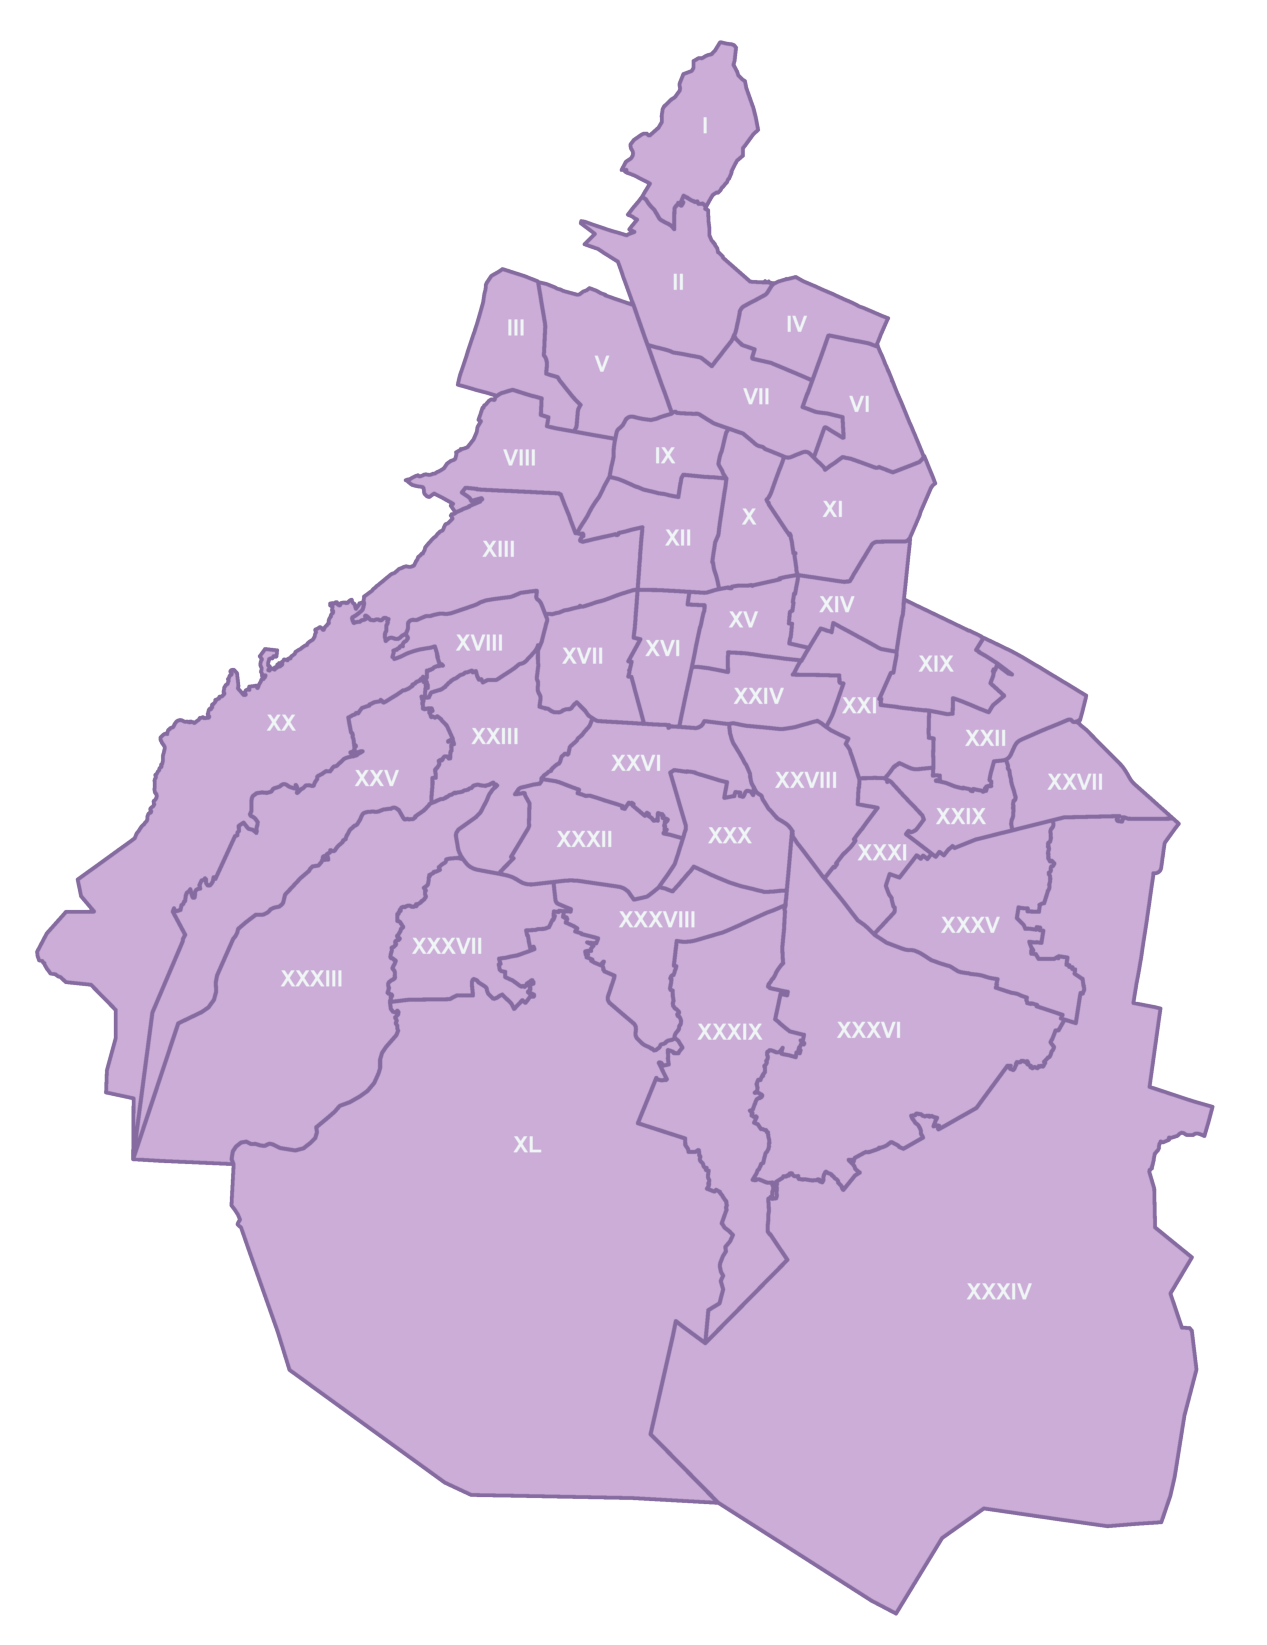

In [ ]:
cdmx_mask = np.array(Image.open('/content/CDMX.png'))
ig = plt.figure()
plt.figure(figsize = (40,30))

plt.imshow(cdmx_mask,  interpolation='bilinear')
plt.axis('off')
plt.show()

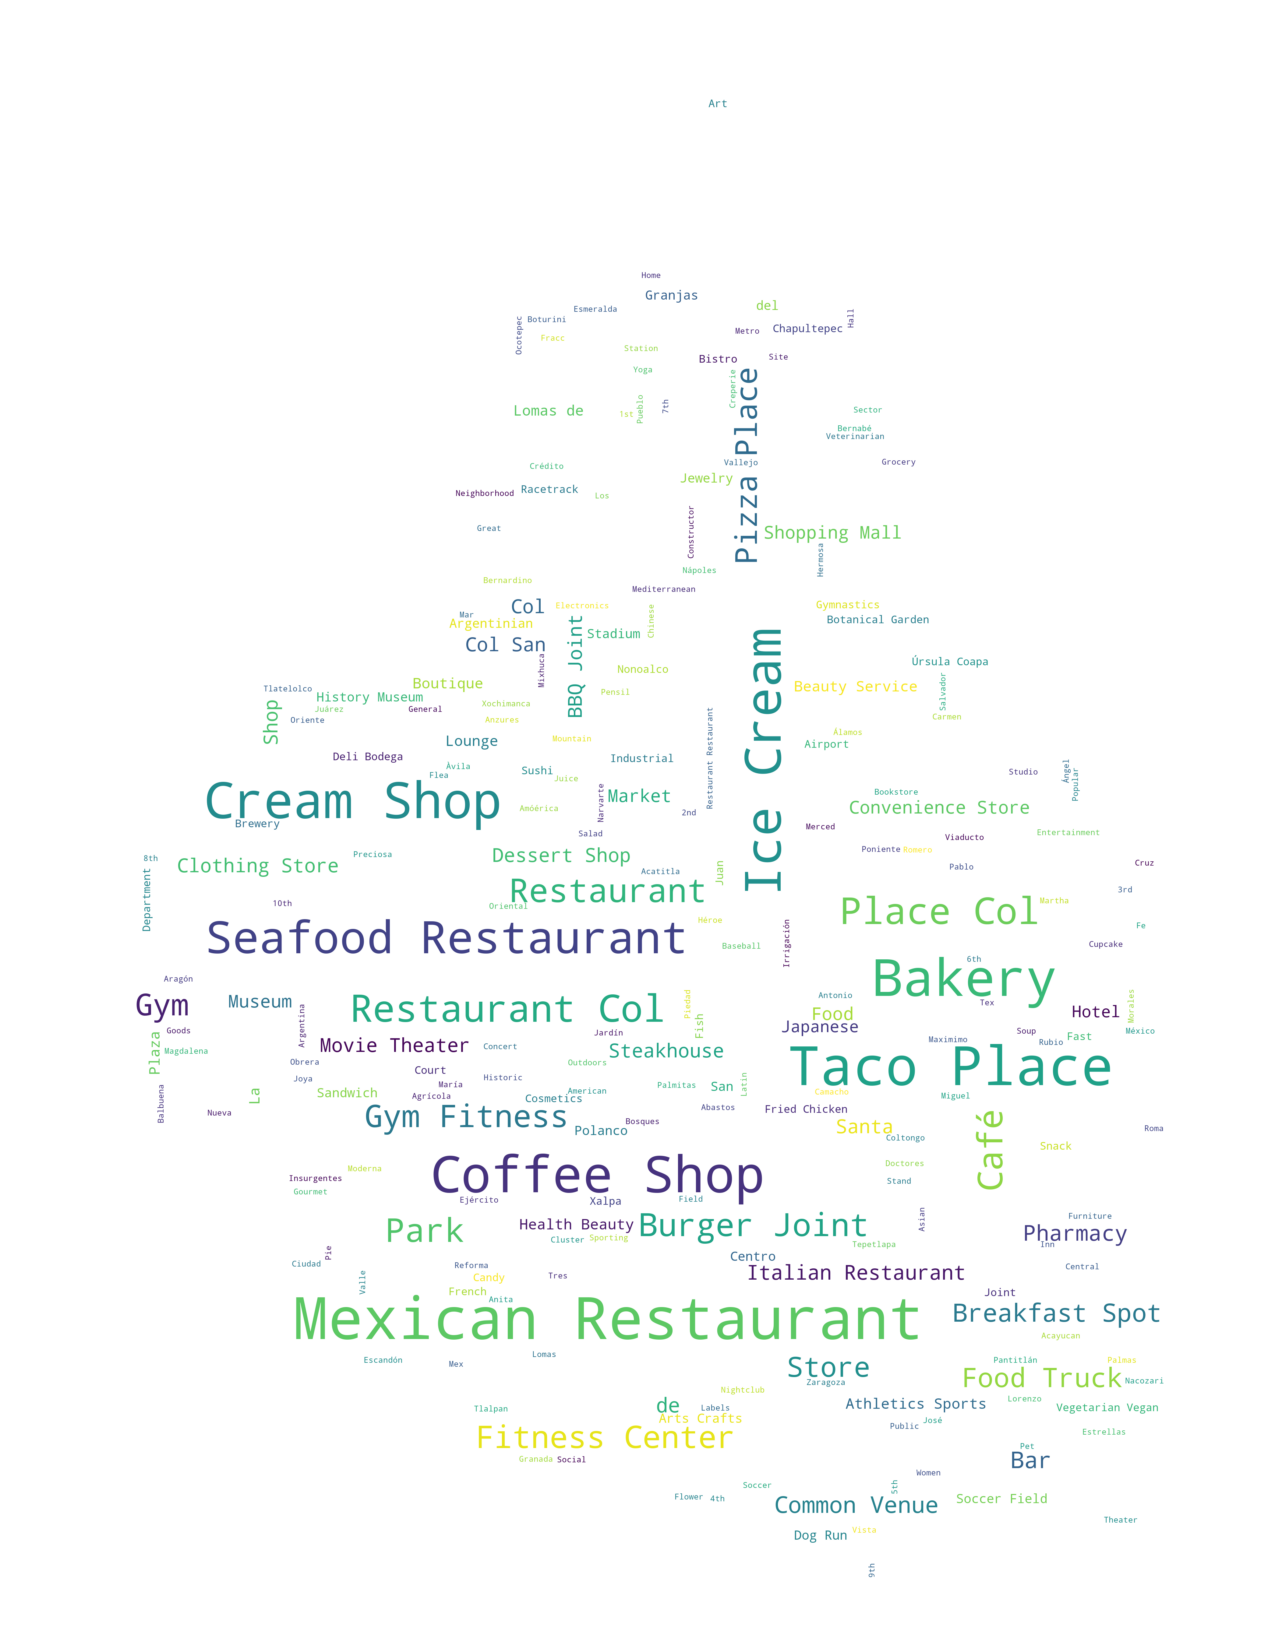

In [ ]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
text = Neighborhoods_venues_sorted

# generating the word cloud
wordcloud = WordCloud(background_color='White', max_words=2000, mask=cdmx_mask, stopwords=stopwords).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 5.2. Clustering Neighborhoods

The following section consists in running k-means to cluster the Neighborhood into 5 clusters. The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.

In [ ]:
# Setting the number of clusters
kclusters = 5

CDMX_grouped_clustering = CDMX_grouped.drop('Neighborhood', 1)

# Running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CDMX_grouped_clustering)

# Checking cluster labels generated for each row in the DataFrame
kmeans.labels_[0:10]

array([4, 0, 0, 4, 3, 3, 1, 0, 2, 0], dtype=int32)

Let's create a new DataFrame that includes the cluster as well as the top 10 venues for each Neighborhood.

In [ ]:
# Adding clustering labels
Neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

CDMX_merged = df_CDMX

# Merging CDMX_grouped with df to add latitude/longitude for each Neighborhood
CDMX_merged = CDMX_merged.join(Neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# Checking the last columns
CDMX_merged.head()

PostalCode         Borough                     Neighborhood   Latitude  \
0      01020  Álvaro Obregón        Col. San José Insurgentes  19.356728   
1      01110  Álvaro Obregón                  Col. Las Palmas  19.395930   
2      01210  Álvaro Obregón   Col. Centro de Ciudad Santa Fe  19.382865   
3      01790  Álvaro Obregón      Col. Lomas de San Ángel Inn  19.344865   
4      02300    Azcapotzalco     Fracc. Industrial de Vallejo  19.498170   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -99.186595               4    Mexican Restaurant           Coffee Shop   
1 -99.214457               2            Taco Place    Mexican Restaurant   
2 -99.240197               1            Taco Place    Mexican Restaurant   
3 -99.206342               1    Mexican Restaurant            Taco Place   
4 -99.163374               1           Coffee Shop            Taco Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop    Seafood Restaurant     French Restaurant   
1           Pizza Place           Coffee Shop                  Park   
2           Coffee Shop          Burger Joint        Ice Cream Shop   
3                Bakery    Seafood Restaurant                  Park   
4    Mexican Restaurant        Clothing Store          Concert Hall   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Taco Place                Bakery                  Park   
1    Seafood Restaurant     Convenience Store  Gym / Fitness Center   
2                   Gym            Restaurant                Bakery   
3            Restaurant           Coffee Shop  Gym / Fitness Center   
4          Burger Joint    Seafood Restaurant            Restaurant   

  9th Most Common Venue  10th Most Common Venue  
0  Gym / Fitness Center      Italian Restaurant  
1                   Gym                     Bar  
2    Italian Restaurant           Movie Theater  
3          Gourmet Shop  Argentinian Restaurant  
4                   Gym    Gym / Fitness Center

The resulting clusters will be visualized using Folium library.

In [ ]:
# Creating the map with folium library
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

CDMX_merged_nonan = CDMX_merged.dropna(subset=['Cluster Labels'])

# Adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CDMX_merged_nonan['Latitude'], CDMX_merged_nonan['Longitude'], CDMX_merged_nonan['Neighborhood'], CDMX_merged_nonan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
    
map_clusters

**Remarks**: Click on the markers to see the Neighborhood and the corresponding cluster. Here below, each cluster is presented with its corresponding color.
* Cluster 0: Red color (CDMX north and south periphery)
* Cluster 1: Purple color (CDMX north outskirts)
* Cluster 2: Light Blue color (CDMX center and south)
* Cluster 3: Light Green color (CDMX center and center-east)
* Cluster 4: Light Orange color (CDMX east outskirts)

### 5.3. Examining the Clusters

Each cluster will be examined and set the discriminating venue categories that distinguish each cluster. Each cluster will be visualized using word cloud with the purpose of looking for the most common venues available in each cluster.

**Cluster 0**

In [ ]:
CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 0, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
6                  Col. Coltongo               0            Taco Place   
30   Col. Maximimo Àvila Camacho               0            Taco Place   
31        Col. Héroe de Nacozari               0            Taco Place   
32               Col. Industrial               0            Taco Place   
33           Col. Tres Estrellas               0            Taco Place   
34       Col. San Juan de Aragón               0            Taco Place   
41           Col. Sector Popular               0            Taco Place   
42      Col. Granjas San Antonio               0            Taco Place   
47        Col. Granjas Esmeralda               0            Taco Place   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6     Mexican Restaurant    Seafood Restaurant        Clothing Store   
30    Mexican Restaurant    Seafood Restaurant        Clothing Store   
31    Mexican Restaurant    Seafood Restaurant           Coffee Shop   
32    Mexican Restaurant                Bakery    Seafood Restaurant   
33    Mexican Restaurant                Bakery           Candy Store   
34    Mexican Restaurant           Coffee Shop            Food Truck   
41    Mexican Restaurant        Ice Cream Shop                Bakery   
42    Mexican Restaurant                Bakery    Seafood Restaurant   
47    Mexican Restaurant                Bakery           Coffee Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6         Ice Cream Shop        Breakfast Spot          Burger Joint   
30        Ice Cream Shop          Dessert Shop        Breakfast Spot   
31          Dessert Shop        Clothing Store         Shopping Mall   
32        Ice Cream Shop                  Café           Coffee Shop   
33                   Gym            Soup Place              Pharmacy   
34                Bakery                   Gym            Restaurant   
41           Coffee Shop    Seafood Restaurant          Burger Joint   
42           Coffee Shop        Ice Cream Shop            Restaurant   
47        Ice Cream Shop                  Café    Athletics & Sports   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6                 Bakery    Italian Restaurant             Food Truck  
30        Gymnastics Gym           Coffee Shop          Shopping Mall  
31        Breakfast Spot          Cupcake Shop           Burger Joint  
32      Sushi Restaurant           Candy Store              Pet Store  
33    Seafood Restaurant          Burger Joint             Restaurant  
34   Fried Chicken Joint         Movie Theater                Brewery  
41            Restaurant          Dessert Shop             Food Truck  
42            Food Truck           Fish Market             Food Court  
47                  Park            Food Truck                Dog Run

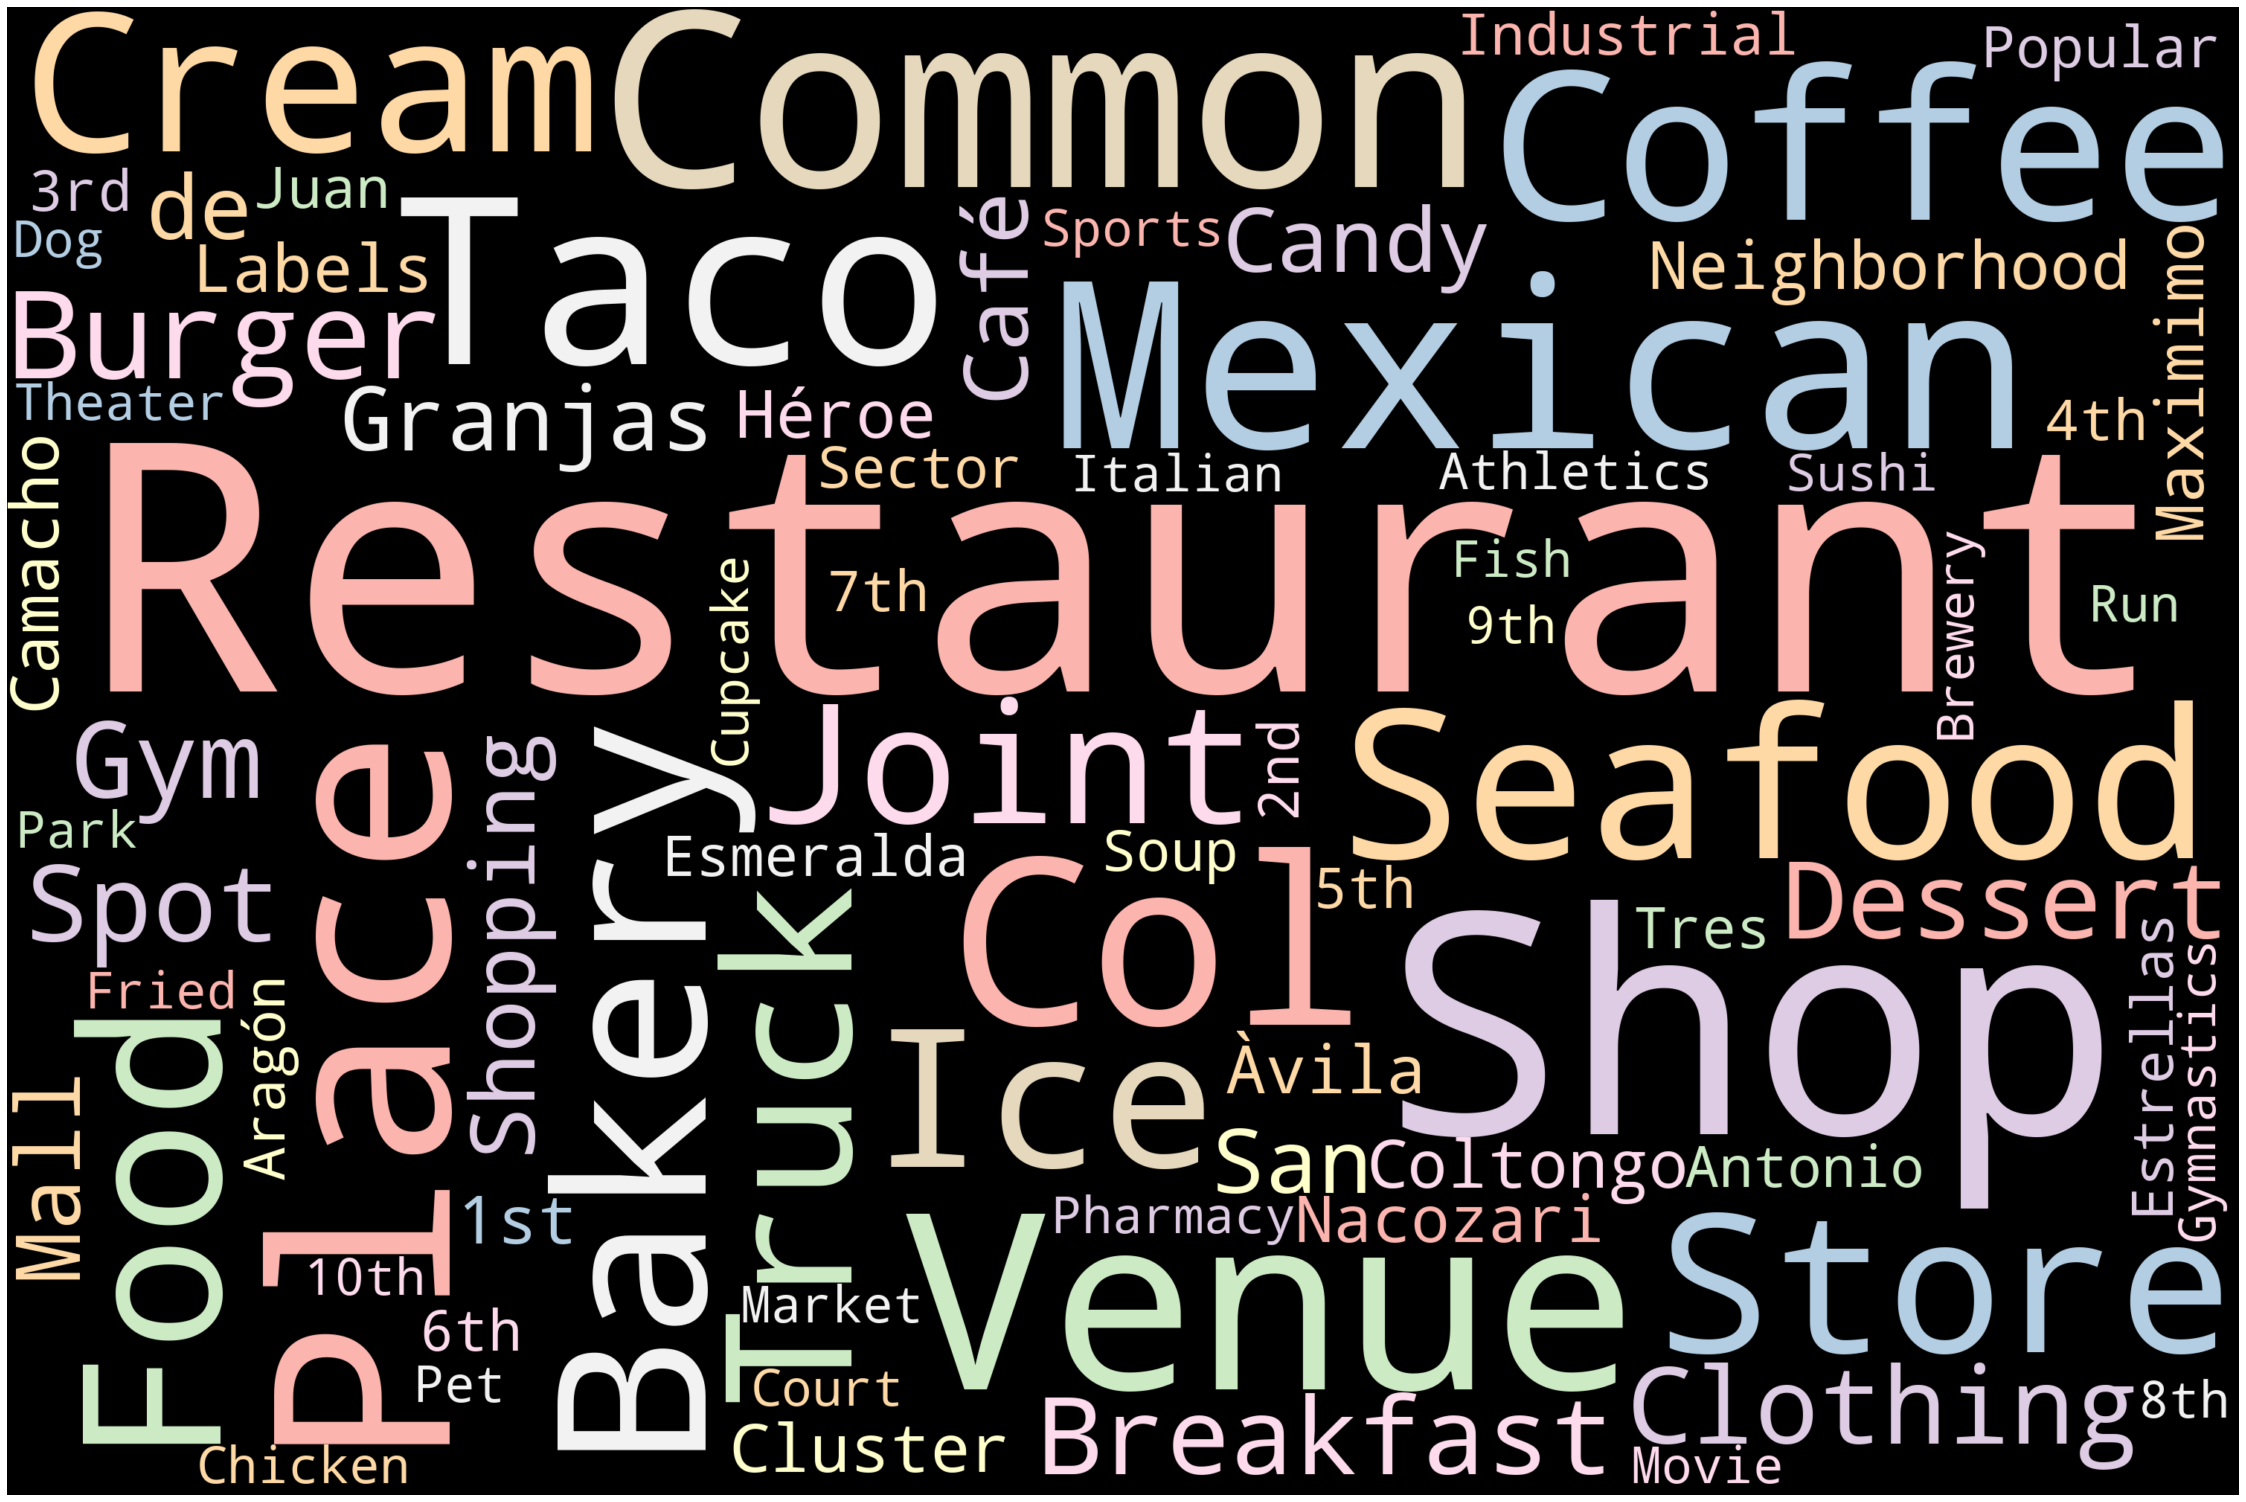

In [ ]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster1 = CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 0, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]
text = df_cluster1

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 1**

In [ ]:
CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 1, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
2        Col. Centro de Ciudad Santa Fe               1            Taco Place   
3           Col. Lomas de San Ángel Inn               1    Mexican Restaurant   
4          Fracc. Industrial de Vallejo               1           Coffee Shop   
20    Col. Pueblo de Santa Úrsula Coapa               1    Mexican Restaurant   
22          Col. Lomas de Vista Hermosa               1            Taco Place   
23            Col. Bosques de las Lomas               1    Mexican Restaurant   
40              Col. Central de Abastos               1    Mexican Restaurant   
44           Col. Santa Martha Acatitla               1           Pizza Place   
45               Col. Lomas de Zaragoza               1           Pizza Place   
46                           Col. Xalpa               1                   Gym   
52              Col. Argentina Poniente               1    Mexican Restaurant   
58                         Col. Polanco               1    Mexican Restaurant   
61            Col. Bosques de las Lomas               1    Mexican Restaurant   
67                         Col. La Joya               1    Mexican Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2     Mexican Restaurant           Coffee Shop          Burger Joint   
3             Taco Place                Bakery    Seafood Restaurant   
4             Taco Place    Mexican Restaurant        Clothing Store   
20        Ice Cream Shop          Soccer Field           Coffee Shop   
22    Mexican Restaurant                 Hotel                   Gym   
23           Coffee Shop            Taco Place        Ice Cream Shop   
40    Seafood Restaurant            Taco Place        Ice Cream Shop   
44            Taco Place    Mexican Restaurant                   Gym   
45    Mexican Restaurant      Department Store     Electronics Store   
46    Mexican Restaurant     Convenience Store          Burger Joint   
52            Taco Place            Restaurant           Coffee Shop   
58            Art Museum            Restaurant                Bakery   
61           Coffee Shop            Taco Place        Ice Cream Shop   
67           Coffee Shop            Taco Place            Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
2         Ice Cream Shop                   Gym            Restaurant   
3                   Park            Restaurant           Coffee Shop   
4           Concert Hall          Burger Joint    Seafood Restaurant   
20        Soccer Stadium  Gym / Fitness Center                  Park   
22         Shopping Mall                Bakery            Restaurant   
23                   Gym         Shopping Mall                  Park   
40           Coffee Shop            Food Court              Pharmacy   
44                Market    Seafood Restaurant                  Park   
45           Coffee Shop                   Bar                   Gym   
46            Food Stand                Bakery            Food Truck   
52        Clothing Store        Cosmetics Shop        Ice Cream Shop   
58                Museum                 Hotel        History Museum   
61                   Gym         Shopping Mall                  Park   
67                  Café              Pharmacy        Ice Cream Shop   

   8th Most Common Venue 9th Most Common Venue  10th Most Common Venue  
2                 Bakery    Italian Restaurant           Movie Theater  
3   Gym / Fitness Center          Gourmet Shop  Argentinian Restaurant  
4             Restaurant                   Gym    Gym / Fitness Center  
20            Taco Place           Pizza Place          Breakfast Spot  
22           Coffee Shop        Ice Cream Shop      Italian Restaurant  
23          Dessert Shop               Dog Run                  Bakery  
40            Food Truck    Tex-Mex Restaurant             Fish Market  
44         Movie Theater   Fried Chicken Joint                Pha

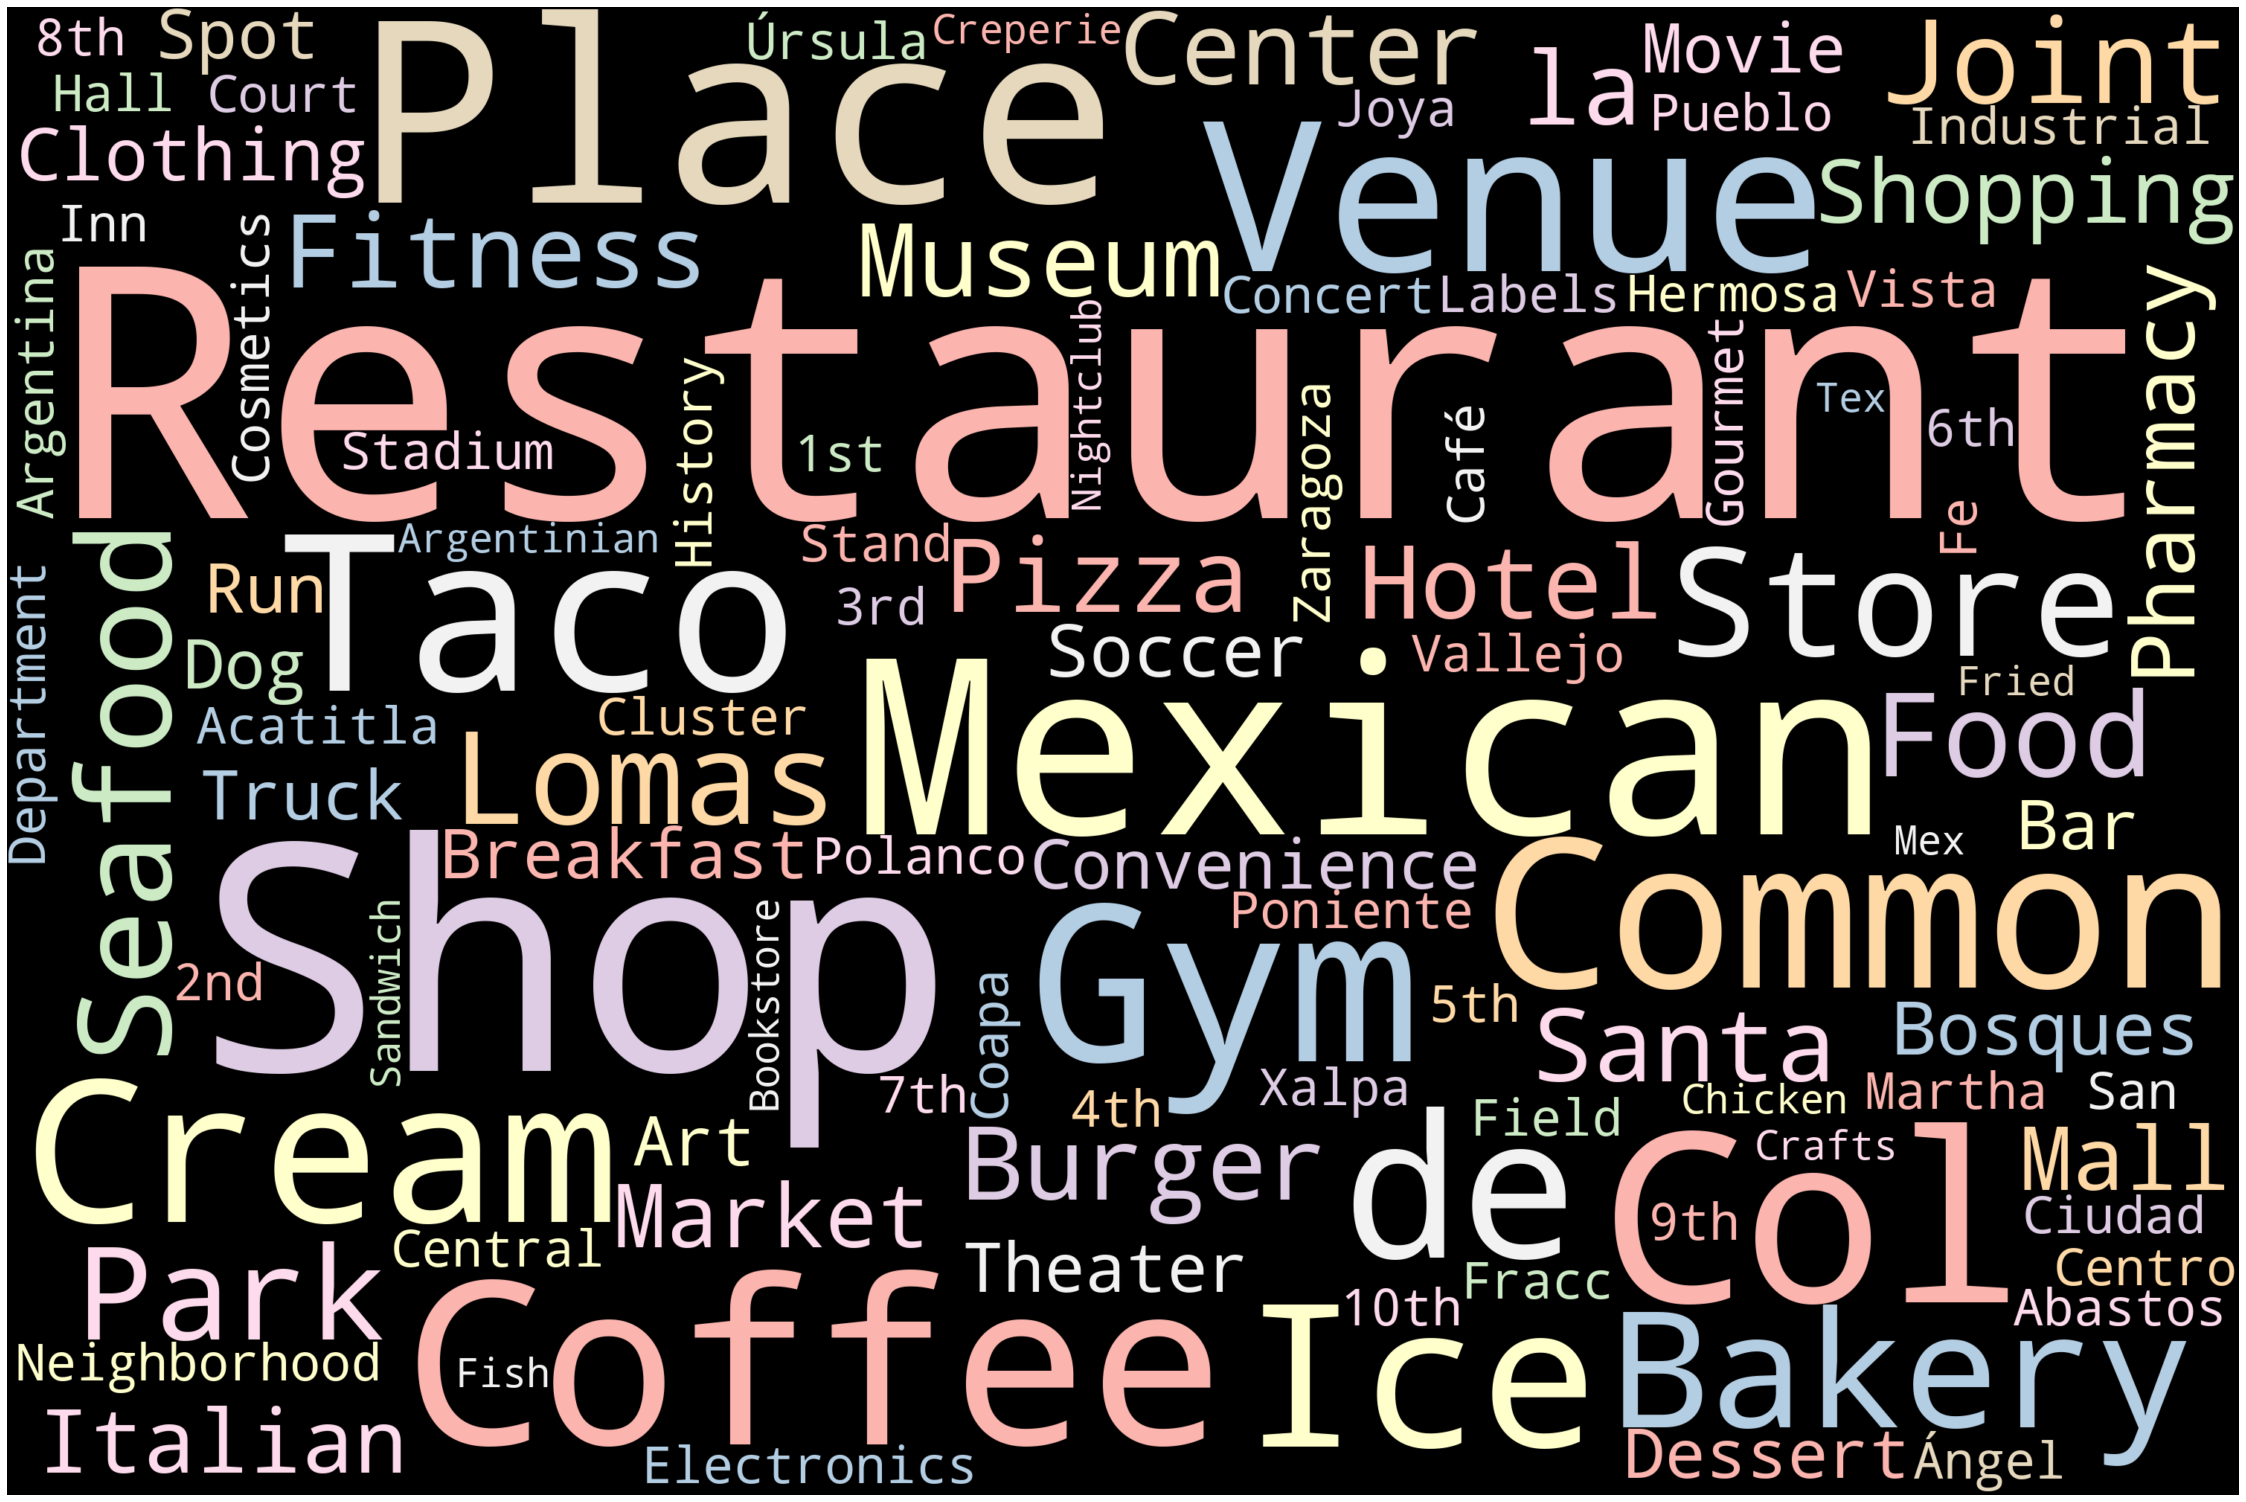

In [ ]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster2 = CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 1, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]
text = df_cluster2

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 2**

In [ ]:
CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 2, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
1              Col. Las Palmas               2            Taco Place   
11                 Col. Álamos               2            Taco Place   
19    Col. San Pablo Tepetlapa               2            Taco Place   
21     Col. Santa Úrsula Coapa               2            Taco Place   
35              Col. Pantitlán               2            Taco Place   
38         Col. Granjas México               2            Taco Place   
39      Col. Agrícola Oriental               2            Taco Place   
43    Col. Ejército de Oriente               2    Mexican Restaurant   
48         Col. San Juan Xalpa               2            Taco Place   
49             Col. Las Palmas               2            Taco Place   
50   Col. San Bernabé Ocotepec               2            Taco Place   
63               Col. Amóérica               2            Taco Place   
65                Col. del Mar               2            Taco Place   
68           Col. Romero Rubio               2            Taco Place   
72        Col. Jardín Balbuena               2    Mexican Restaurant   
73         Col. San Bernardino               2            Taco Place   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1     Mexican Restaurant           Pizza Place           Coffee Shop   
11    Mexican Restaurant        Ice Cream Shop          Burger Joint   
19                  Park    Mexican Restaurant        Ice Cream Shop   
21    Mexican Restaurant            Food Truck  Gym / Fitness Center   
35                Bakery    Mexican Restaurant           Pizza Place   
38    Mexican Restaurant             Racetrack          Burger Joint   
39    Mexican Restaurant        Ice Cream Shop                Bakery   
43            Taco Place                  Park                   Bar   
48    Mexican Restaurant      Sushi Restaurant                Bakery   
49    Mexican Restaurant           Pizza Place           Coffee Shop   
50    Mexican Restaurant           Pizza Place           Coffee Shop   
63    Mexican Restaurant                Museum                Bakery   
65    Mexican Restaurant  Gym / Fitness Center           Flea Market   
68    Mexican Restaurant                Bakery    Seafood Restaurant   
72            Taco Place                Bakery           Coffee Shop   
73    Mexican Restaurant        Ice Cream Shop                Bakery   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1                   Park    Seafood Restaurant     Convenience Store   
11                  Park                Bakery                  Café   
19  Gym / Fitness Center           Coffee Shop            Restaurant   
21          Burger Joint           Coffee Shop           Pizza Place   
35        Airport Lounge                Market          Dessert Shop   
38    Athletics & Sports           Coffee Shop          Soccer Field   
39             Racetrack           Coffee Shop        Clothing Store   
43                   Gym    Seafood Restaurant           Pizza Place   
48     Convenience Store                  Park                Lounge   
49                  Park    Seafood Restaurant     Convenience Store   
50    Seafood Restaurant     Convenience Store              Mountain   
63          Burger Joint    Athletics & Sports                Bistro   
65    Seafood Restaurant           Pizza Place                  Café   
68             BBQ Joint        Airport Lounge           Coffee Shop   
72           Pizza Place              Pharmacy             BBQ Joint   
73  Gym / Fitness Center           Flower Shop            Restaurant   

   8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
1   Gym / Fitness Center                     Gym                    Bar  
11    Seafood Restaurant          Breakfast Spot                Brewery  
19                Bakery          Breakfast Spot             Food Truck  
21        Ice Cream Shop                    Par

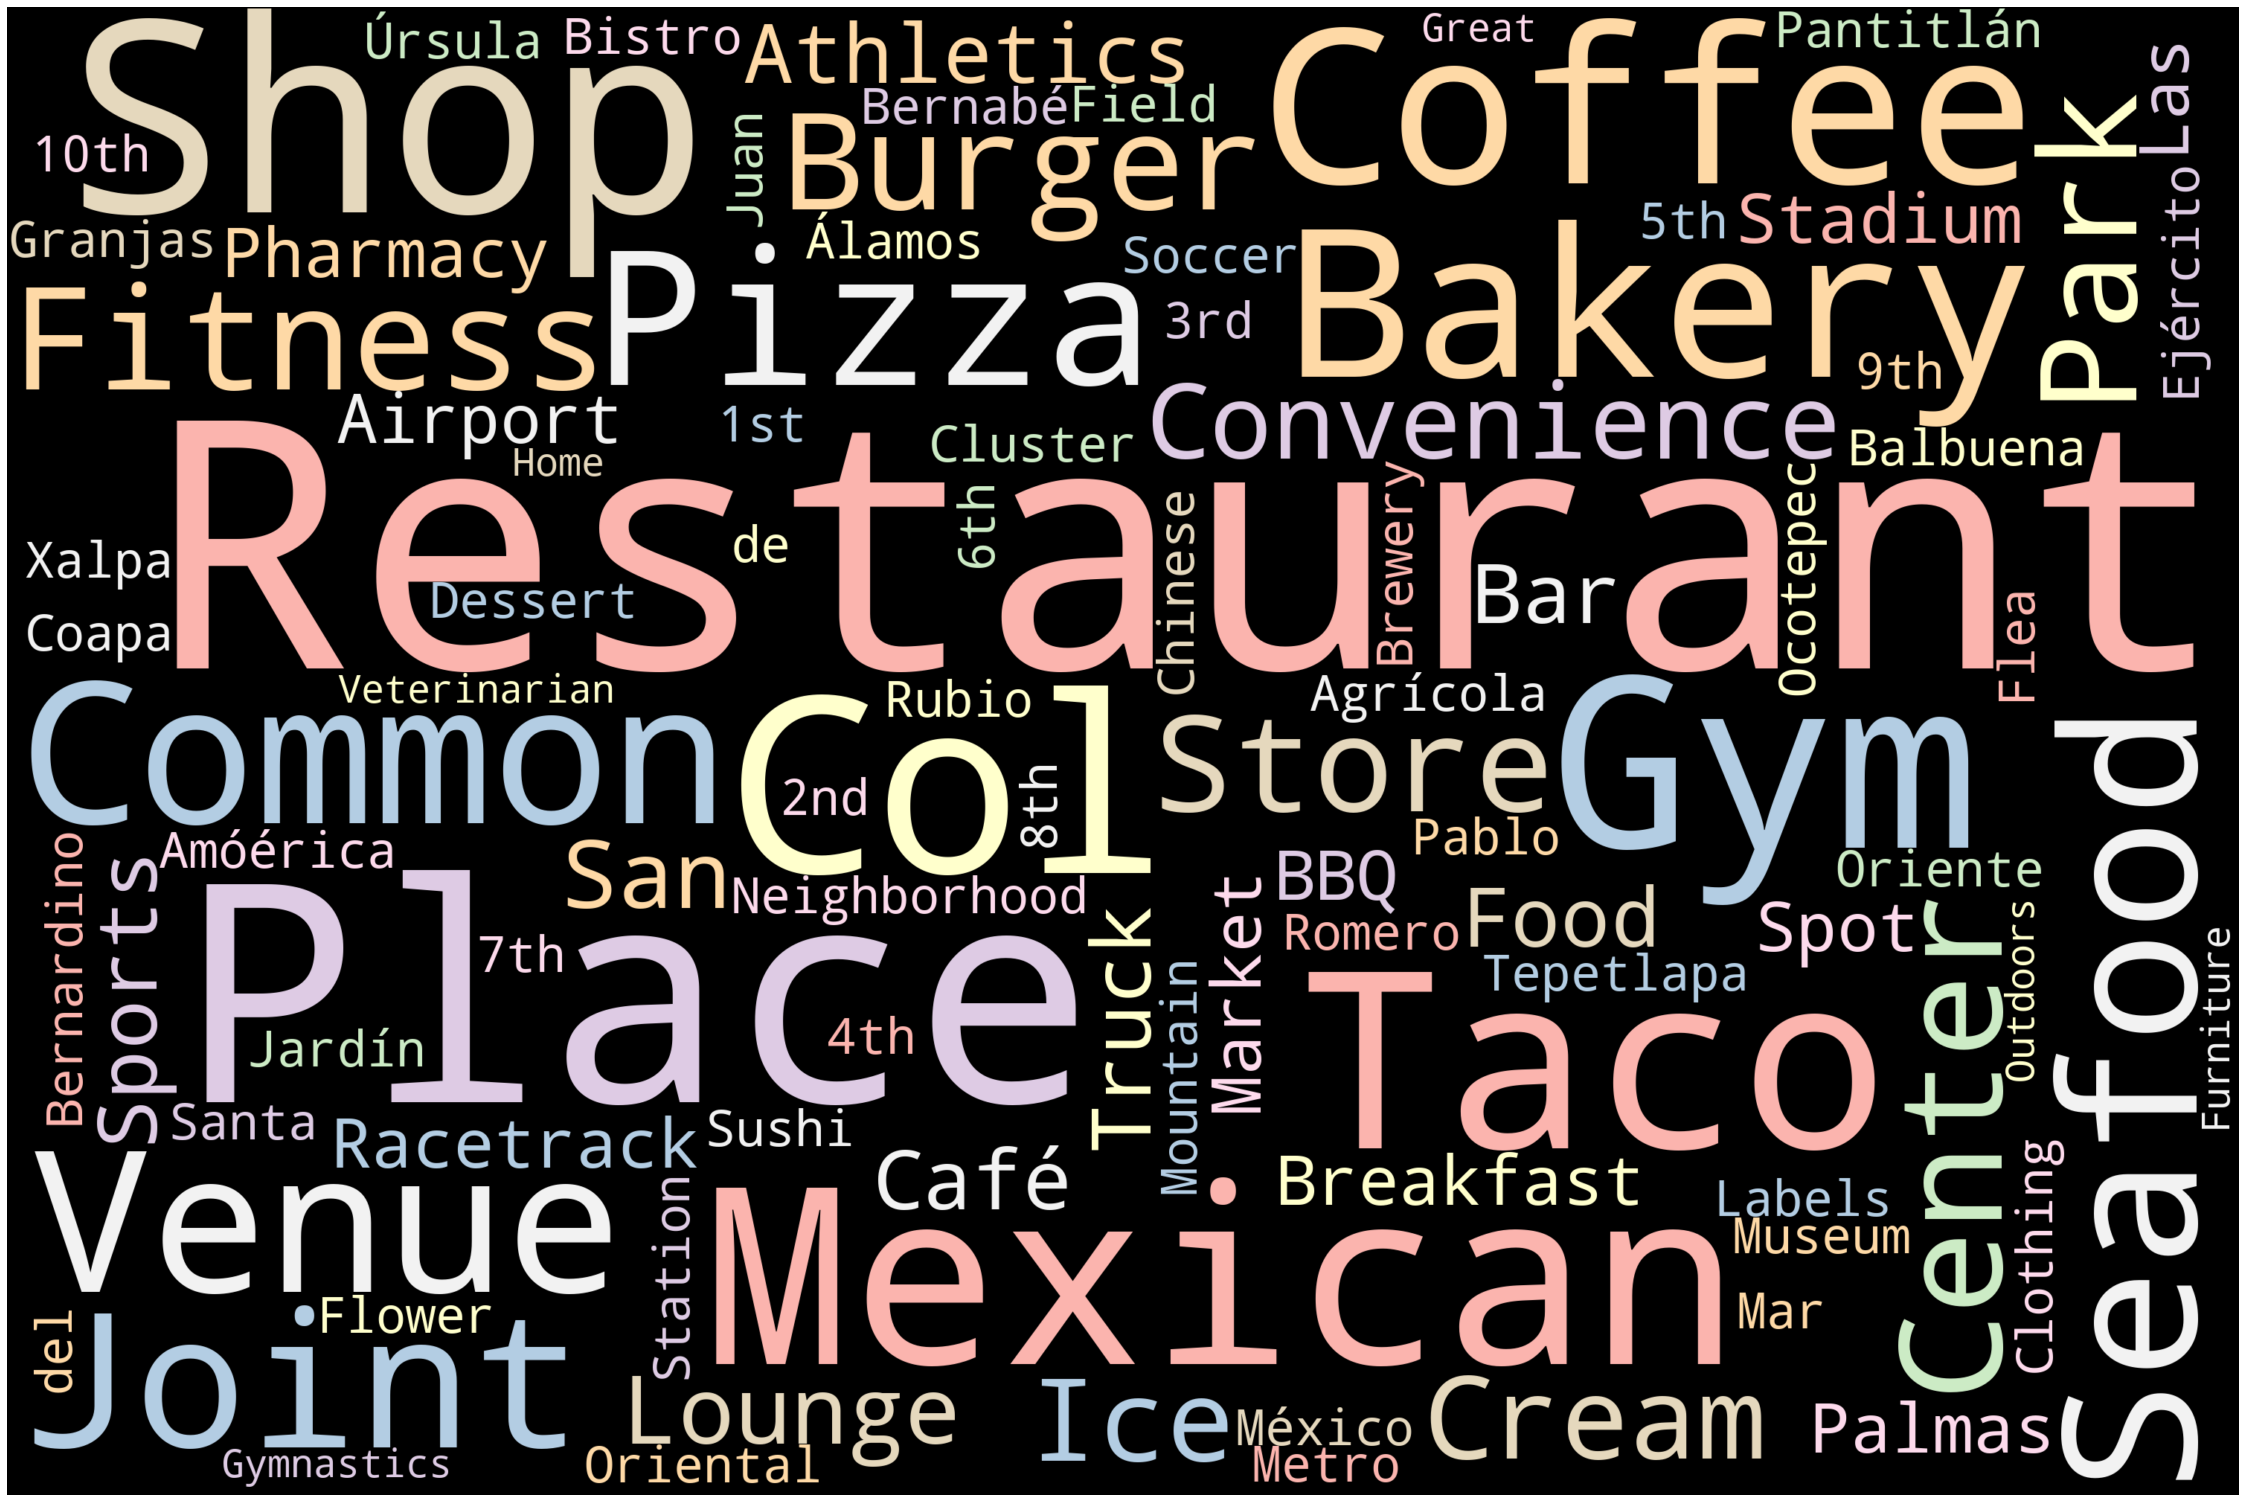

In [ ]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster3 = CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 2, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]
text = df_cluster3

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 3**

In [ ]:
CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 3, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
5                Col. La Preciosa               3    Mexican Restaurant   
7        Col. Santa Cruz Acayucan               3    Mexican Restaurant   
8          Col. Nueva Santa María               3    Mexican Restaurant   
9    Col. San Salvador Xochimanca               3    Mexican Restaurant   
15                   Col. Moderna               3    Mexican Restaurant   
24                    Col. Centro               3    Mexican Restaurant   
28                    Col. Obrera               3    Mexican Restaurant   
29       Col. Nonoalco Tlatelolco               3    Mexican Restaurant   
36           Col. Viaducto Piedad               3    Mexican Restaurant   
37               Col. Santa Anita               3    Mexican Restaurant   
53                    Col. Pensil               3    Mexican Restaurant   
69             Col. Merced Centro               3    Mexican Restaurant   
70          Col. Lorenzo Boturini               3    Mexican Restaurant   
71         Col. Magdalena Mixhuca               3    Mexican Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5             Taco Place                Bakery        Ice Cream Shop   
7                 Bakery            Taco Place                  Park   
8         Ice Cream Shop            Taco Place                Bakery   
9         Ice Cream Shop            Taco Place                Bakery   
15            Taco Place        Ice Cream Shop          Burger Joint   
24            Taco Place        Ice Cream Shop           Coffee Shop   
28                Bakery            Taco Place                   Bar   
29            Taco Place  Gym / Fitness Center                Bakery   
36            Taco Place        Ice Cream Shop                Bakery   
37            Taco Place        Ice Cream Shop    Seafood Restaurant   
53            Taco Place        Ice Cream Shop                Bakery   
69            Taco Place           Coffee Shop                Bakery   
70            Taco Place           Coffee Shop                  Café   
71            Taco Place           Coffee Shop    Seafood Restaurant   

   5th Most Common Venue 6th Most Common Venue   7th Most Common Venue  \
5   Gym / Fitness Center            Food Truck          Baseball Field   
7     Seafood Restaurant        Ice Cream Shop             Coffee Shop   
8             Restaurant              Pharmacy            Burger Joint   
9            Coffee Shop              Pharmacy                    Park   
15                Bakery                  Park            Dessert Shop   
24                Bakery                 Plaza      Seafood Restaurant   
28    Seafood Restaurant        Ice Cream Shop     Arts & Crafts Store   
29        History Museum                   Gym          Ice Cream Shop   
36          Burger Joint                  Park    Fast Food Restaurant   
37                Bakery            Restaurant            Burger Joint   
53           Pizza Place        Breakfast Spot               BBQ Joint   
69                 Plaza        Ice Cream Shop     Arts & Crafts Store   
70    Seafood Restaurant        Ice Cream Shop  Argentinian Restaurant   
71            Restaurant                  Café            Soccer Field   

     8th Most Common Venue 9th Most Common Venue     10th Most Common Venue  
5       Seafood Restaurant          Burger Joint           Botanical Garden  
7           Breakfast Spot  Gym / Fitness Center           Botanical Garden  
8              Pizza Place    Seafood Restaurant             Breakfast Spot  
9           Breakfast Spot            Restaurant               Burger Joint  
15               Juice Bar            Steakhouse                Coffee Shop  
24             Salad Place            Restaurant      General Entertainment  
28           Deli / Bodega              Pie Shop       Gym / Fitness Center  
29                    Food                  Park               Dessert Shop  
3

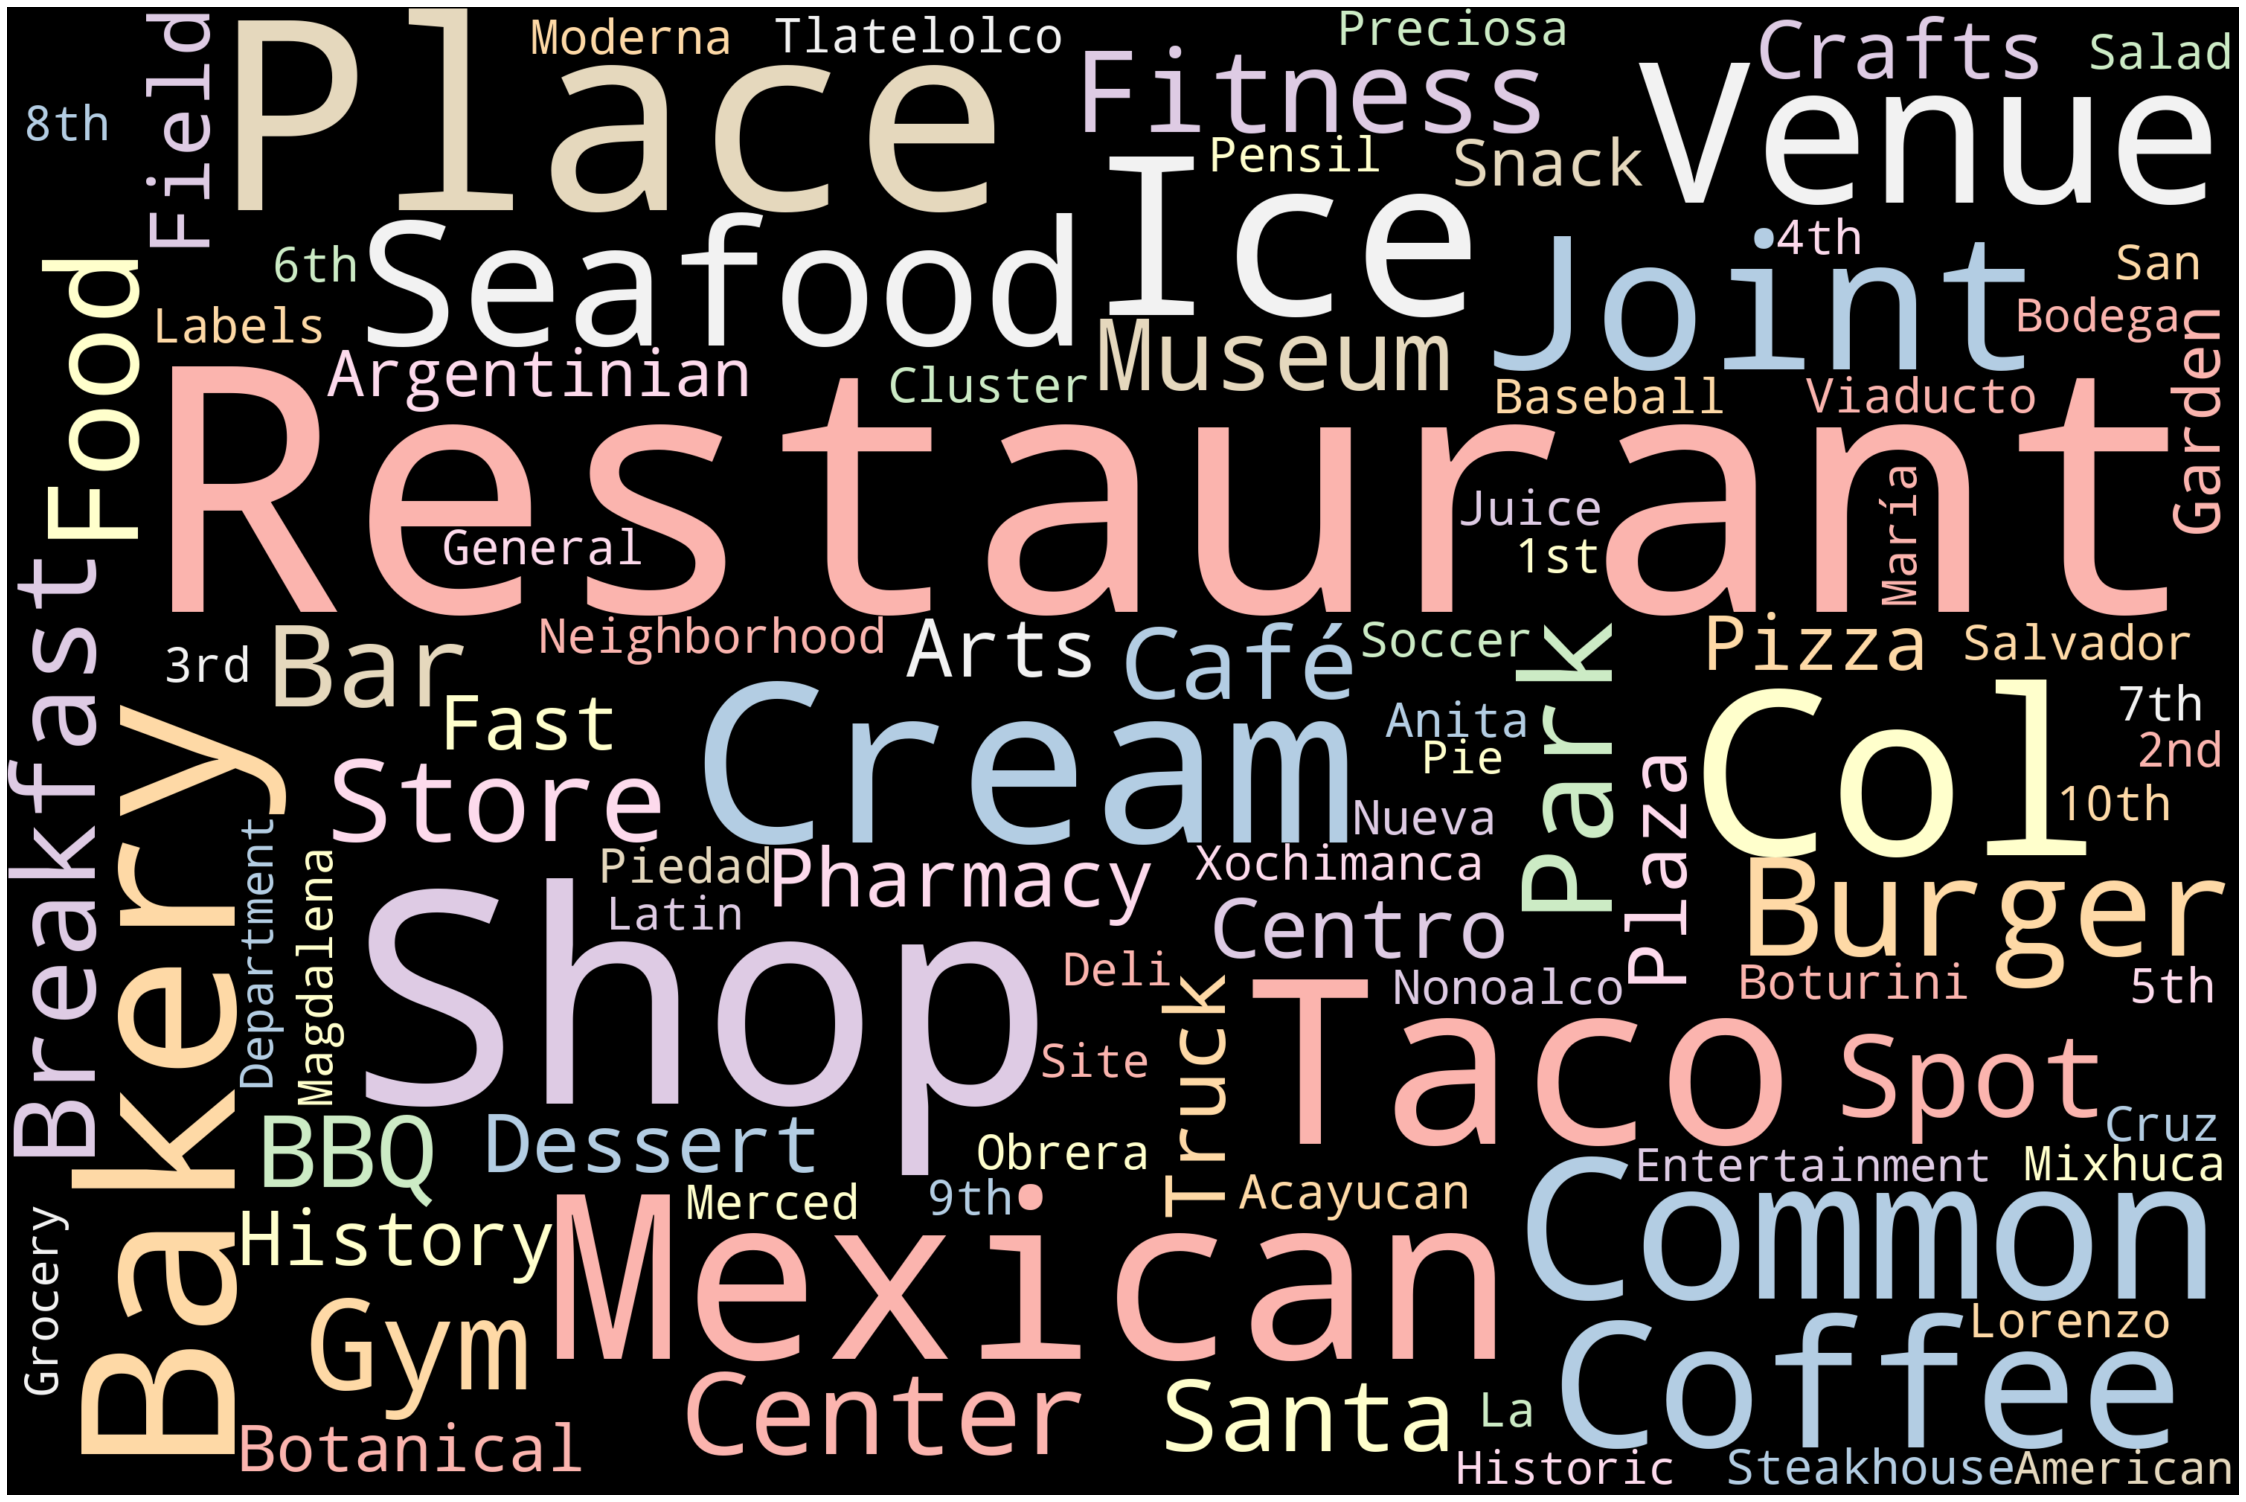

In [ ]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster4 = CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 3, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]
text = df_cluster4

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cluster 4**

In [ ]:
CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 4, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
0    Col. San José Insurgentes               4    Mexican Restaurant   
10               Col. Narvarte               4           Coffee Shop   
12              Col. Del Valle               4    Mexican Restaurant   
13                Col. Nápoles               4           Coffee Shop   
14               Col. Nonoalco               4            Taco Place   
16   Col. San José Insurgentes               4    Mexican Restaurant   
17    Col. Crédito Constructor               4    Mexican Restaurant   
18             Col. del Carmen               4                   Bar   
25                 Col. Juárez               4           Coffee Shop   
26                   Col. Roma               4           Coffee Shop   
27               Col. Doctores               4           Coffee Shop   
51   Col. Lomas de Chapultepec               4           Coffee Shop   
54             Col. Irrigación               4    Mexican Restaurant   
55    Col. Los Morales Polanco               4           Coffee Shop   
56                Col. Granada               4           Coffee Shop   
57       Col. Palmitas Polanco               4    Mexican Restaurant   
59                Col. Anzures               4                Bakery   
60         Col. Reforma Social               4                Bakery   
62               Col. Escandón               4        Ice Cream Shop   
64      San Miguel Chapultepec               4            Taco Place   
66                Col. Tlalpan               4            Taco Place   

   2nd Most Common Venue 3rd Most Common Venue          4th Most Common Venue  \
0            Coffee Shop        Ice Cream Shop             Seafood Restaurant   
10            Taco Place    Mexican Restaurant                 Ice Cream Shop   
12        Ice Cream Shop                Bakery                    Coffee Shop   
13        Ice Cream Shop            Taco Place             Mexican Restaurant   
14                Bakery                  Park             Seafood Restaurant   
16           Coffee Shop        Ice Cream Shop             Seafood Restaurant   
17           Coffee Shop        Ice Cream Shop             Seafood Restaurant   
18    Mexican Restaurant                  Café                    Coffee Shop   
25        Ice Cream Shop                Bakery             Mexican Restaurant   
26        Ice Cream Shop                Bakery  Vegetarian / Vegan Restaurant   
27    Mexican Restaurant                Bakery                 Ice Cream Shop   
51                Bakery            Restaurant                     Taco Place   
54           Coffee Shop        Ice Cream Shop                  Movie Theater   
55                  Café    Mexican Restaurant                 Ice Cream Shop   
56    Mexican Restaurant              Boutique           Gym / Fitness Center   
57        Ice Cream Shop   Japanese Restaurant                          Hotel   
59           Coffee Shop                 Hotel             Seafood Restaurant   
60           Coffee Shop            Restaurant                     Taco Place   
62    Mexican Restaurant           Coffee Shop                           Café   
64        Ice Cream Shop            Public Art             Mexican Restaurant   
66         Movie Theater                Bakery                       Boutique   

   5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0      French Restaurant            Taco Place                   Bakery   
10                Bakery    Seafood Restaurant  Health & Beauty Service   
12            Taco Place   Japanese Restaurant  Health & Beauty Service   
13                Bakery   Japanese Restaurant  Health & Beauty Service   
14        Ice Cream Shop    Mexican Restaurant               Food Truck   
16     French Restaurant            Taco Place                   Bakery   
17  Gym / Fitness Center            Steakhouse        French Restaurant   
18                 Plaza        Ice Cream Shop    

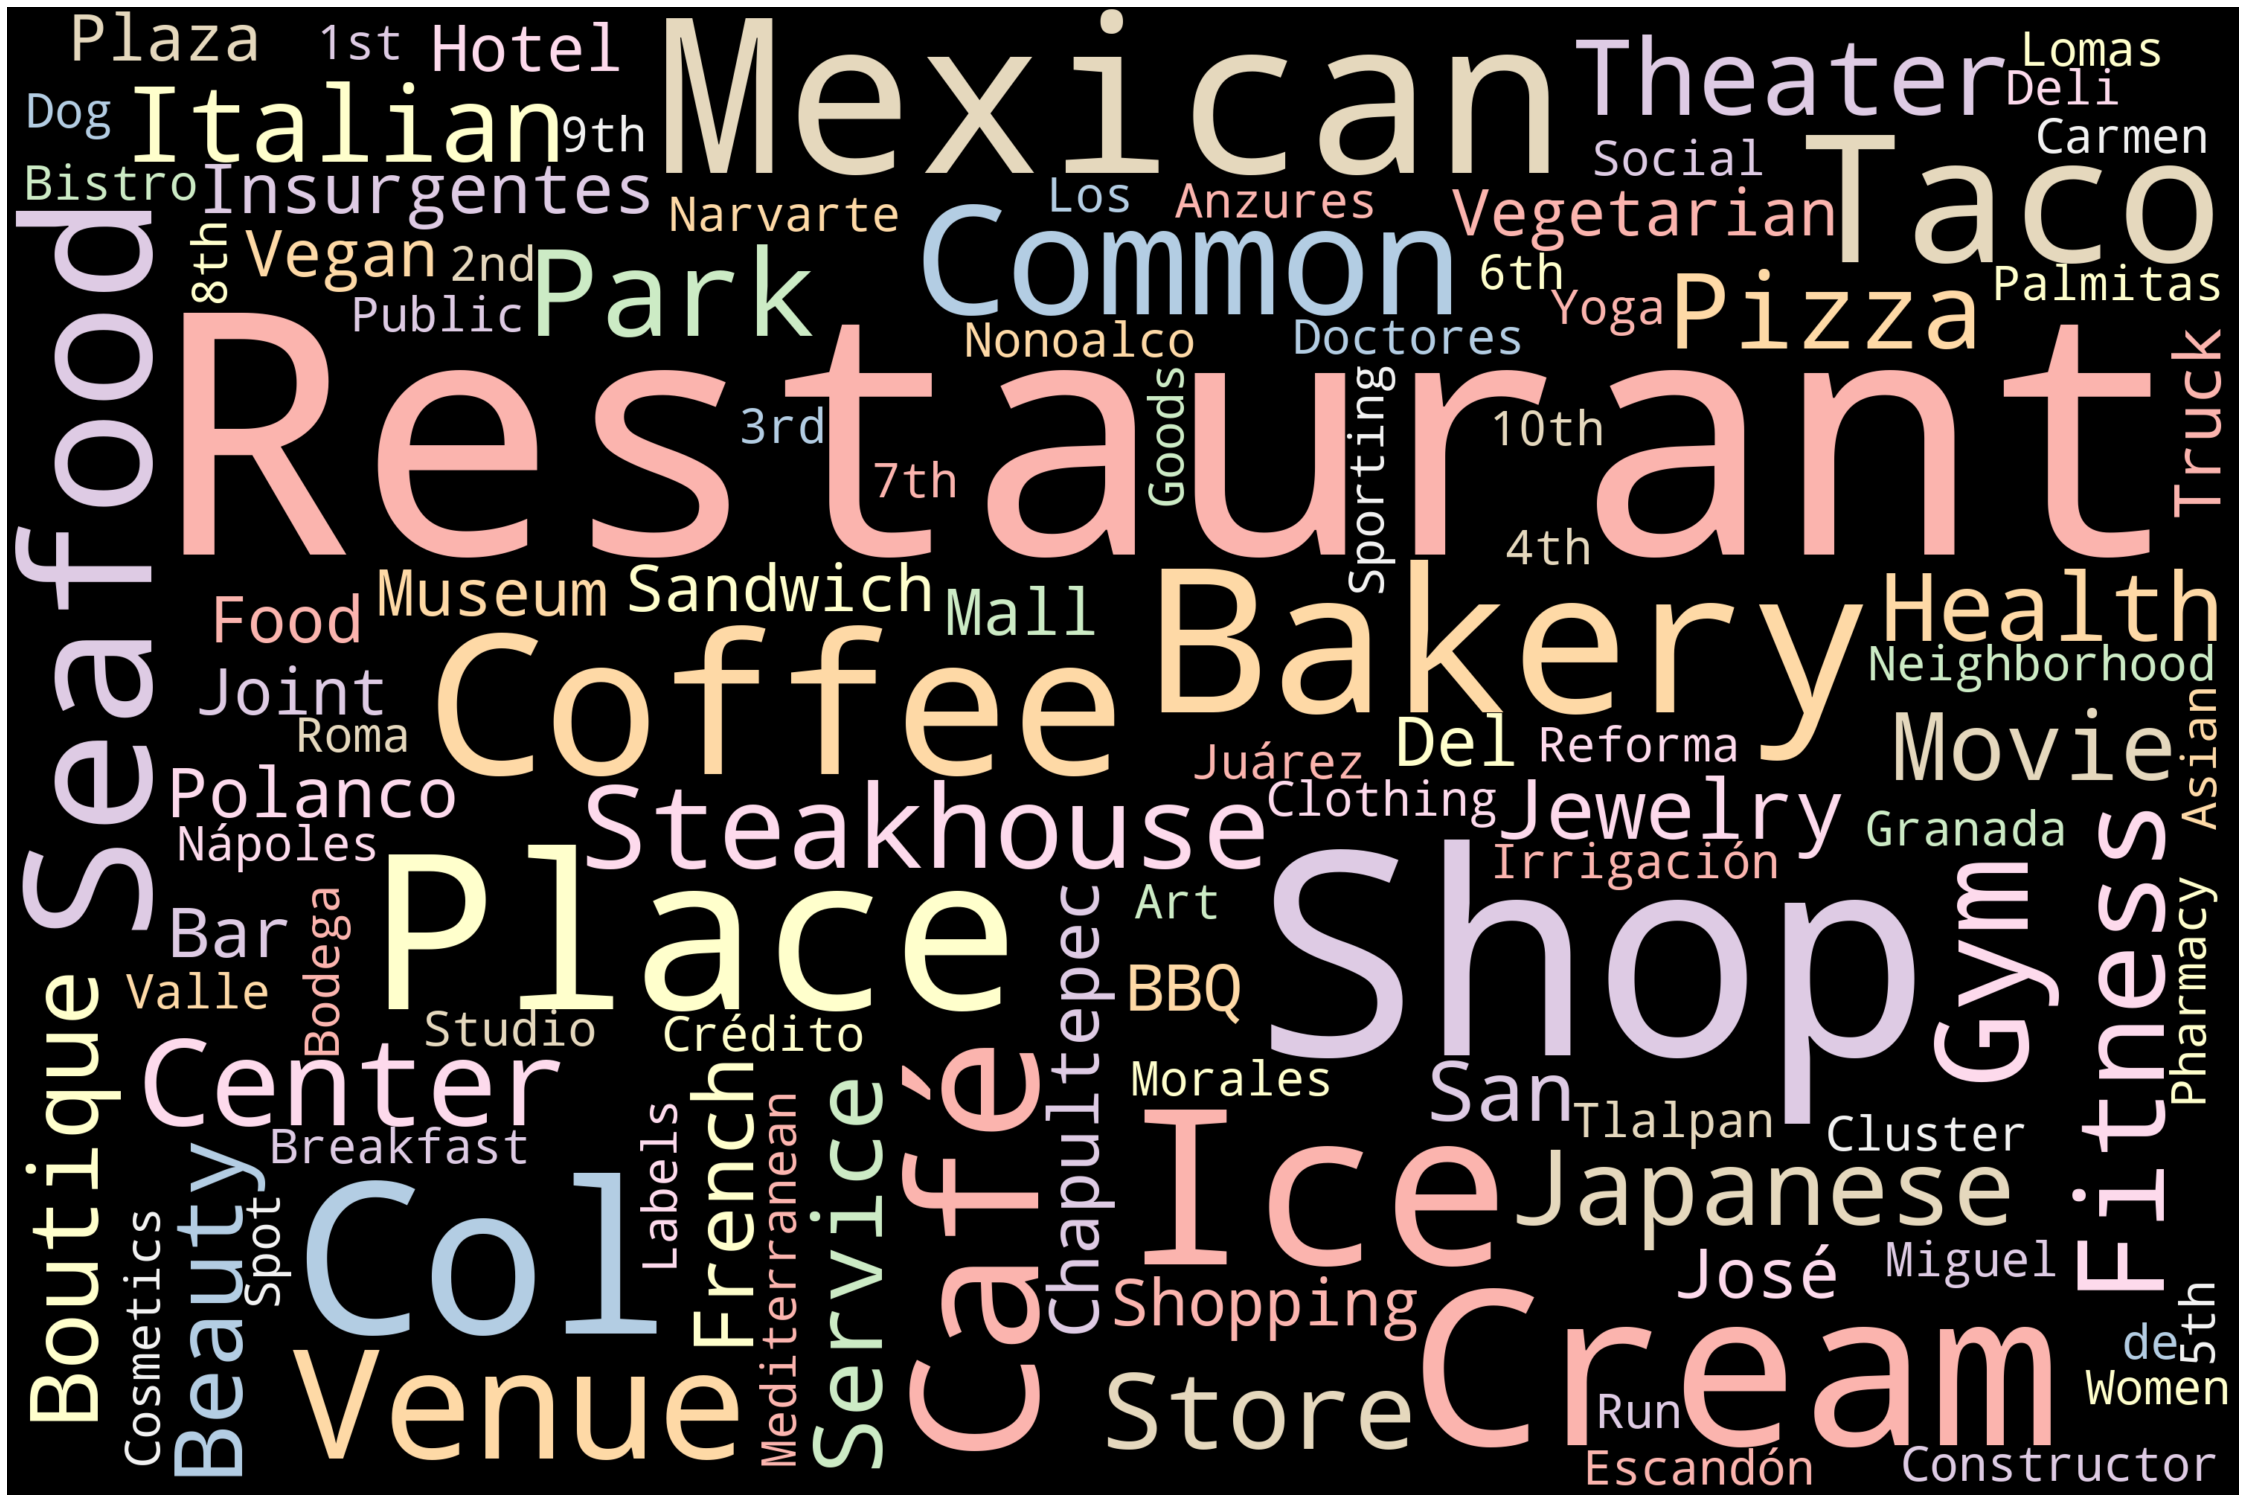

In [ ]:
# using the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)

# passing the DataFrame to a new variable to extract the plain text content afterwards
df_cluster5 = CDMX_merged_nonan.loc[CDMX_merged_nonan['Cluster Labels'] == 4, CDMX_merged_nonan.columns[[2] + list(range(5, CDMX_merged_nonan.shape[1]))]]
text = df_cluster5

# generating the word cloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color = 'Black',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(str(text))

# plotting the word cloud
plt.figure(figsize = (40,30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 6. Results and Discussion <a name="results"></a>

The explanatory analysis revealed that there is a wide variety of venue categories in CDMX  ranging from restaurants, bars to bookstores, art museums, hotels, gyms and so on. It is important to highlight that the most frequent venues are mexican restaurants and taco places, this might sound very obvious but it is amazing how it is very clear, in each of the 73 neighborhoods these 2 venues are always in the top ten, showing how citizens are proud of their food, and they are willing to consume it very frequently. 

It is said than in Mexico city every 2 streets you will find a taco place, and acoording to this analysis it is a real fact.

Regarding the big quantities of mexican restaurants don´t get the wrong idea, those places donpt serve all the same food, CDMX is the capital og the country, this means it is where all the ways meet, and by ways i mean food, here we have food of each state, Mexico has 31 states and each of them has an unique gastronomy and a very diffent style, so yes, we have a lot of mexican restaurants, but I can assure you that the food in every restauran will be different, there is no enough life to taste all the flavours our coucine has, I'm sure, with no doubt, Mexico has the best food of the whole world, and CDMX has the best food of Mexico. :)

### 6.1. Limitations and recommendations for further research

I don´t know why but I think the venues founde are not even close to the real numbers of venues, the number of hotels, museums, restaurants and other venues is very small, I have lived here my whole life and I know we haver much more places.

Another thing to mention is taht the API didn´t retrinve any of the landmarks, I loked for them but never found them

## 7. Conclusion <a name="conclusion"></a>

CDMX is one of the most popular tourist destinations in Mexico with full of things to do and visit. It is a place full of history, art, money, universities, restaurants, but moreover it is the first impression we gice to the world, when tourists come to our beaches they are probably landin here first, so I'm sure if yo come and visit this amazing city you wont regret it, our food has been labeled as cultural heritage of Humanity and with the largest quantity of restaurants I'm sure you will fall in love with the food and you'll want to try all of our dishes. 
 

Although the decision of the optimal potential places to visit in CDMX  will be taken by visitors, it can be concluded considering the results of the explanatory analysis that the most common and popular venues are located in the center, center-east and south periphery of CDMX . This recommendation is based on additional factors such as proximity of iconic attractions, availability of train stations and closeness to  center.